# Selection and analysis of significant genes from MutSig2CV
### NUOVA VERSIONE: GLI IPERMUTATI TOLTI SONO 18 (7 TRIPLI NEGATIVI E 11 NON TRIPLI NEGATIVI) E GLI IPOMUTATI TOLTI SONO 9 (2 TN E 7 NON TN)

In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import os
import sklearn

In [2]:
os.chdir("C:/Users/Cristina/OneDrive/Documenti/BCG/Tesi/MutSig2CV_output_definitivo")

### TRIPLE NEGATIVE 

In [3]:
# mutations are sorted in ascending order of overall p-value (the first ones being the most statistically significant)
# sig_genes.txt in output from MutSig
# TOTAL dataset of the Triple-Negative patients
mutsig_TN=pd.read_csv('sig_genes_TN_definitivo.txt', sep=None, engine='python')
mutsig_TN

,rank,gene,longname,codelen,nnei,nncd,nsil,nmis,nstp,nspl,nind,nnon,npat,nsite,pCV,pCL,pFN,p,q
0,1,TP53,tumor protein p53,1902,21,0,2,130,41,19,62,252,245,136,1.000000e-16,0.00001,0.00001,1.000000e-16,1.886200e-12
1,2,RB1,retinoblastoma 1 (including osteosarcoma),3716,58,0,1,2,3,2,7,14,14,14,1.191497e-09,1.00000,0.16400,7.639530e-09,4.851383e-05
2,3,PIK3CA,"phosphoinositide-3-kinase, catalytic, alpha po...",3287,11,0,2,33,0,1,6,40,33,20,3.383222e-05,0.00001,0.01835,7.716122e-09,4.851383e-05
3,4,FBXW7,F-box and WD repeat domain containing 7,2580,34,0,0,9,1,0,3,13,13,12,3.146559e-07,0.41900,0.08600,8.592980e-07,4.052020e-03
4,5,PTEN,phosphatase and tensin homolog (mutated in mul...,1244,17,0,0,4,4,0,1,9,9,9,1.237588e-07,1.00000,0.62900,2.092134e-06,7.197792e-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18857,18858,AADACL2,arylacetamide deacetylase-like 2,1223,7,0,0,0,0,0,0,0,0,0,1.000000e+00,NaN,NaN,1.000000e+00,1.000000e+00
18858,18859,AAAS,"achalasia, adrenocortical insufficiency, alacr...",1703,99,0,1,0,0,0,0,0,0,0,1.000000e+00,NaN,NaN,1.000000e+00,1.000000e+00
18859,18860,A4GNT,"alpha-1,4-N-acetylglucosaminyltransferase",1031,176,0,0,0,0,0,0,0,0,0,1.000000e+00,NaN,NaN,1.000000e+00,1.000000e+00
18860,18861,A2LD1,NaN,466,0,0,0,0,0,0,0,0,0,0,1.000000e+00,NaN,NaN,1.000000e+00,1.000000e+00


### Correct the gene names 

In [4]:
# replace the correct Hugo symbols in the significant mutated genes in TN dataset
mutsig_TN['gene'] = mutsig_TN['gene'].replace(['MOSC1','C22orf36', 'C16orf7','FAM55C', 'C1orf130', 'KIAA0494', 'MYST1', 'C14orf43', 'KIAA0831', 'C12orf11', 'KIAA0528', 'ZFP106', 'PION', 'DIMT1L', 'EIF2C1', 'C1orf107', 'C3orf59', 'RGNEF', 'C17orf95', 'MLL5', 'PPYR1', 'C6orf167', 'MLL2', 'C15orf33', 'BPIL1', 'C20orf103', 'SLC9A10', 'C14orf68', 'ZNF167', 'METT11D1', 'C14orf156', 'C9orf123', 'C1orf9', 'C10orf18', 'KIAA1012', 'C18orf10', 'SPINLW1', 'RBM16', 'KIAA0467', 'SFRS11', 'C1orf103', 'ORC2L', 'C1orf31', 'ALS2CR8', 'KIAA0427'], ['MARC1','FAM211B', 'VPS9D1', 'NXPE3', 'NCMAP', 'EFCAB14', 'KAT8', 'ELMSAN1', 'ATG14', 'ASUN', 'C2CD5', 'ZNF106', 'GSAP', 'DIMT1', 'AGO1', 'DIEXF', 'MB21D2', 'ARHGEF28', 'METTL23', 'KMT2E', 'NPY4R', 'MMS22L', 'KMT2D', 'FAM227B', 'BPIFB2', 'LAMP5', 'SLC9C1', 'SLC25A47', 'ZKSCAN7', 'METTL17', 'SLIRP', 'TMEM261', 'SUCO', 'FAM208B', 'TRAPPC8', 'TPGS2', 'EPPIN-WFDC6', 'SCAF8', 'SZT2', 'SRSF11', 'LRIF1', 'ORC2', 'COA6', 'CARF', 'CTIF'])

In [5]:
# replace the correct Hugo symbols in the significant mutated genes in TN dataset
mutsig_TN['gene'] = mutsig_TN['gene'].replace(['KIAA0494', 'C6orf167', 'MLL3', 'SFRS18', 'C1orf103', 'FAM55C', 'SR140', 'C1orf130', 'C14orf43', 'TARP', 'TSGA14', 'COPG', 'TMEM111', 'CEP110', 'C14orf129', 'MYST1'], ['EFCAB14', 'MMS22L', 'KMT2C', 'PNISR', 'LRIF1', 'NXPE3', 'U2SURP', 'NCMAP', 'ELMSAN1', 'TRGC1','CEP41', 'COPG1', 'EMC3', 'CNTRL', 'GSKIP', 'KAT8'])

In [6]:
# replace the correct Hugo symbols in the significant mutated genes in TN dataset
mutsig_TN['gene'] = mutsig_TN['gene'].replace(['FAM190A', 'NFKBIL2', 'KIAA0802'], ['CCSER1', 'TONSL', 'SOGA2'])

In [7]:
# replace the correct Hugo symbols in the significant mutated genes in TN dataset
mutsig_TN['gene'] = mutsig_TN['gene'].replace(['C20orf123', 'KBTBD5', 'C1orf25'], ['OCSTAMP', 'KLHL40', 'TRMT1L'])

In [8]:
# replace the correct Hugo symbols in the significant mutated genes in TN dataset
mutsig_TN['gene'] = mutsig_TN['gene'].replace(['GCFC1', 'MUDENG', 'TTC15', 'SIP1', 'C5orf33', 'WDR45L', 'C11orf9', 'SFRS4', 'FAM82A1', 'KIAA1632', 'MLL'], ['PAXBP1', 'AP5M1', 'TRAPPC12', 'ZEB2', 'NADK2', 'WDR45B', 'MYRF', 'SRSF4', 'RMDN2', 'EPG5', 'KMT2A'])

In [9]:
# see if there are some missing p-values in the dataset 
mutsig_TN['p'].isna().sum()

0

In [10]:
# which genes have a p-value of 1?
mutsig_TN.loc[mutsig_TN['p'] == 1]

,rank,gene,longname,codelen,nnei,nncd,nsil,nmis,nstp,nspl,nind,nnon,npat,nsite,pCV,pCL,pFN,p,q
10334,10335,FAM186A,"family with sequence similarity 186, member A",7086,0,0,1,4,0,0,0,4,4,4,0.999744,1.0,0.627,1.0,1.0
10335,10336,FAM71E2,"family with sequence similarity 71, member E2",2809,0,0,1,2,0,0,0,2,2,2,0.999784,1.0,0.752,1.0,1.0
10336,10337,USP27X,"ubiquitin specific peptidase 27, X-linked",1317,0,0,1,2,0,0,0,2,2,2,0.999860,1.0,0.929,1.0,1.0
10337,10338,DNAH2,"dynein, axonemal, heavy chain 2",13622,1,2,3,2,0,0,0,2,2,2,0.999876,1.0,0.825,1.0,1.0
10338,10339,PCDHA1,protocadherin alpha 1,36132,0,5,3,1,0,0,0,1,1,1,1.000000,NaN,NaN,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18857,18858,AADACL2,arylacetamide deacetylase-like 2,1223,7,0,0,0,0,0,0,0,0,0,1.000000,NaN,NaN,1.0,1.0
18858,18859,AAAS,"achalasia, adrenocortical insufficiency, alacr...",1703,99,0,1,0,0,0,0,0,0,0,1.000000,NaN,NaN,1.0,1.0
18859,18860,A4GNT,"alpha-1,4-N-acetylglucosaminyltransferase",1031,176,0,0,0,0,0,0,0,0,0,1.000000,NaN,NaN,1.0,1.0
18860,18861,A2LD1,NaN,466,0,0,0,0,0,0,0,0,0,0,1.000000,NaN,NaN,1.0,1.0


In [11]:
mutsig_TN.loc[mutsig_TN['q'] == 1]

,rank,gene,longname,codelen,nnei,nncd,nsil,nmis,nstp,nspl,nind,nnon,npat,nsite,pCV,pCL,pFN,p,q
23,24,PSKH1,protein serine kinase H1,1283,80,0,0,2,1,0,0,3,3,2,0.018183,0.0078,0.9121,0.001399,1.0
24,25,CCRL2,chemokine (C-C motif) receptor-like 2,1075,17,0,0,2,0,1,0,3,3,3,0.001845,1.0000,0.0580,0.001401,1.0
25,26,CREBBP,CREB binding protein (Rubinstein-Taybi syndrome),7449,2,0,0,5,1,1,3,10,10,10,0.000145,1.0000,0.7740,0.001429,1.0
26,27,NAA50,"N(alpha)-acetyltransferase 50, NatE catalytic ...",526,22,0,0,3,0,0,0,3,3,3,0.001858,1.0000,0.0710,0.001458,1.0
27,28,AMZ1,archaelysin family metallopeptidase 1,1517,17,0,1,2,1,0,0,3,3,2,0.025761,0.0057,0.9980,0.001511,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18857,18858,AADACL2,arylacetamide deacetylase-like 2,1223,7,0,0,0,0,0,0,0,0,0,1.000000,NaN,NaN,1.000000,1.0
18858,18859,AAAS,"achalasia, adrenocortical insufficiency, alacr...",1703,99,0,1,0,0,0,0,0,0,0,1.000000,NaN,NaN,1.000000,1.0
18859,18860,A4GNT,"alpha-1,4-N-acetylglucosaminyltransferase",1031,176,0,0,0,0,0,0,0,0,0,1.000000,NaN,NaN,1.000000,1.0
18860,18861,A2LD1,NaN,466,0,0,0,0,0,0,0,0,0,0,1.000000,NaN,NaN,1.000000,1.0


### NON TRIPLE NEGATIVE

In [12]:
# mutations are sorted in ascending order of overall p-value (the first ones being the most statistically significant)
# sig_genes.txt in output from MutSig
# training set of the NON Triple-Negative patients
mutsig_NONTN=pd.read_csv('sig_genes_NONTN_definitivo.txt', sep=None, engine='python')
mutsig_NONTN

,rank,gene,longname,codelen,nnei,nncd,nsil,nmis,nstp,nspl,nind,nnon,npat,nsite,pCV,pCL,pFN,p,q
0,1,PIK3CA,"phosphoinositide-3-kinase, catalytic, alpha po...",3287,11,0,6,442,1,1,23,467,425,61,3.593902e-15,0.00001,0.00001,1.000000e-16,5.235257e-13
1,2,TP53,tumor protein p53,1902,25,0,3,252,55,25,55,387,380,184,1.000000e-16,0.00001,0.00001,1.000000e-16,5.235257e-13
2,3,GATA3,GATA binding protein 3,1351,1,1,4,16,4,1,155,176,171,96,8.529122e-16,0.00001,0.76329,1.000000e-16,5.235257e-13
3,4,MAP2K4,mitogen-activated protein kinase kinase 4,1242,1,0,1,24,12,6,20,62,61,52,1.000000e-16,0.00470,0.60180,1.110223e-16,5.235257e-13
4,5,MAP3K1,mitogen-activated protein kinase kinase kinase 1,4615,23,0,6,31,24,8,103,166,113,147,1.231998e-15,0.01700,0.92800,1.665335e-15,5.235257e-12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18857,18858,ACOT13,acyl-CoA thioesterase 13,691,41,0,0,0,0,0,0,0,0,0,1.000000e+00,NaN,NaN,1.000000e+00,1.000000e+00
18858,18859,ACBD7,acyl-Coenzyme A binding domain containing 7,281,2,2,0,0,0,0,0,0,0,0,1.000000e+00,NaN,NaN,1.000000e+00,1.000000e+00
18859,18860,ACADM,"acyl-Coenzyme A dehydrogenase, C-4 to C-12 str...",1322,5,1,0,0,0,0,0,0,0,0,1.000000e+00,NaN,NaN,1.000000e+00,1.000000e+00
18860,18861,ACAA1,acetyl-Coenzyme A acyltransferase 1 (peroxisom...,1637,14,0,2,0,0,0,0,0,0,0,1.000000e+00,NaN,NaN,1.000000e+00,1.000000e+00


In [13]:
# correct some gene names
mutsig_NONTN['gene'] = mutsig_NONTN['gene'].replace(['MOSC1','C22orf36', 'C16orf7','FAM55C', 'C1orf130', 'KIAA0494', 'MYST1', 'C14orf43', 'KIAA0831', 'C12orf11', 'KIAA0528', 'ZFP106', 'PION', 'DIMT1L', 'EIF2C1', 'C1orf107', 'C3orf59', 'RGNEF', 'C17orf95', 'MLL5', 'PPYR1', 'C6orf167', 'MLL2', 'C15orf33', 'BPIL1', 'C20orf103', 'SLC9A10', 'C14orf68', 'ZNF167', 'METT11D1', 'C14orf156', 'C9orf123', 'C1orf9', 'C10orf18', 'KIAA1012', 'C18orf10', 'SPINLW1', 'RBM16', 'KIAA0467', 'SFRS11', 'C1orf103', 'ORC2L', 'C1orf31', 'ALS2CR8', 'KIAA0427'], ['MARC1','FAM211B', 'VPS9D1', 'NXPE3', 'NCMAP', 'EFCAB14', 'KAT8', 'ELMSAN1', 'ATG14', 'ASUN', 'C2CD5', 'ZNF106', 'GSAP', 'DIMT1', 'AGO1', 'DIEXF', 'MB21D2', 'ARHGEF28', 'METTL23', 'KMT2E', 'NPY4R', 'MMS22L', 'KMT2D', 'FAM227B', 'BPIFB2', 'LAMP5', 'SLC9C1', 'SLC25A47', 'ZKSCAN7', 'METTL17', 'SLIRP', 'TMEM261', 'SUCO', 'FAM208B', 'TRAPPC8', 'TPGS2', 'EPPIN-WFDC6', 'SCAF8', 'SZT2', 'SRSF11', 'LRIF1', 'ORC2', 'COA6', 'CARF', 'CTIF'])
mutsig_NONTN['gene'] = mutsig_NONTN['gene'].replace(['KIAA0494', 'C6orf167', 'MLL3', 'SFRS18', 'C1orf103', 'FAM55C', 'SR140', 'C1orf130', 'C14orf43', 'TARP', 'TSGA14', 'COPG', 'TMEM111', 'CEP110', 'C14orf129', 'MYST1'], ['EFCAB14', 'MMS22L', 'KMT2C', 'PNISR', 'LRIF1', 'NXPE3', 'U2SURP', 'NCMAP', 'ELMSAN1', 'TRGC1','CEP41', 'COPG1', 'EMC3', 'CNTRL', 'GSKIP', 'KAT8'])

In [14]:
# replace the correct Hugo symbols in the significant mutated genes
mutsig_NONTN['gene'] = mutsig_NONTN['gene'].replace(['FAM190A', 'NFKBIL2', 'KIAA0802'], ['CCSER1', 'TONSL', 'SOGA2'])

In [15]:
# replace the correct Hugo symbols in the significant mutated genes 
mutsig_NONTN['gene'] = mutsig_NONTN['gene'].replace(['C20orf123', 'KBTBD5', 'C1orf25'], ['OCSTAMP', 'KLHL40', 'TRMT1L'])

In [16]:
# replace the correct Hugo symbols in the significant mutated genes 
mutsig_NONTN['gene'] = mutsig_NONTN['gene'].replace(['GCFC1', 'MUDENG', 'TTC15', 'SIP1', 'C5orf33', 'WDR45L', 'C11orf9', 'SFRS4', 'FAM82A1', 'KIAA1632', 'MLL'], ['PAXBP1', 'AP5M1', 'TRAPPC12', 'ZEB2', 'NADK2', 'WDR45B', 'MYRF', 'SRSF4', 'RMDN2', 'EPG5', 'KMT2A'])

In [17]:
# see if there are some missing p-values in the dataset 
mutsig_NONTN['p'].isna().sum()

0

In [18]:
mutsig_NONTN.loc[mutsig_NONTN['gene'] == 'FAM82A1']

,rank,gene,longname,codelen,nnei,nncd,nsil,nmis,nstp,nspl,nind,nnon,npat,nsite,pCV,pCL,pFN,p,q


In [19]:
# which genes have a p-value equal to 1?
mutsig_NONTN.loc[mutsig_NONTN['p'] == 1]

,rank,gene,longname,codelen,nnei,nncd,nsil,nmis,nstp,nspl,nind,nnon,npat,nsite,pCV,pCL,pFN,p,q
15760,15761,KCND2,"potassium voltage-gated channel, Shal-related ...",1913,1,1,4,2,1,0,0,3,3,3,0.999684,1.0,0.520,1.0,1.0
15761,15762,GRM7,"glutamate receptor, metabotropic 7",2861,0,2,8,4,1,0,2,7,7,7,0.999686,1.0,0.954,1.0,1.0
15762,15763,BBS7,Bardet-Biedl syndrome 7,2223,0,3,3,2,0,0,0,2,2,2,0.999693,1.0,0.575,1.0,1.0
15763,15764,ZNF432,zinc finger protein 432,1971,1,0,0,7,0,0,1,8,7,8,0.999699,1.0,0.966,1.0,1.0
15764,15765,CHST7,carbohydrate (N-acetylglucosamine 6-O) sulfotr...,1465,1,0,2,5,0,0,0,5,5,5,0.999720,1.0,0.805,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18857,18858,ACOT13,acyl-CoA thioesterase 13,691,41,0,0,0,0,0,0,0,0,0,1.000000,NaN,NaN,1.0,1.0
18858,18859,ACBD7,acyl-Coenzyme A binding domain containing 7,281,2,2,0,0,0,0,0,0,0,0,1.000000,NaN,NaN,1.0,1.0
18859,18860,ACADM,"acyl-Coenzyme A dehydrogenase, C-4 to C-12 str...",1322,5,1,0,0,0,0,0,0,0,0,1.000000,NaN,NaN,1.0,1.0
18860,18861,ACAA1,acetyl-Coenzyme A acyltransferase 1 (peroxisom...,1637,14,0,2,0,0,0,0,0,0,0,1.000000,NaN,NaN,1.0,1.0


In [20]:
mutsig_NONTN.loc[mutsig_NONTN['q'] == 1]

,rank,gene,longname,codelen,nnei,nncd,nsil,nmis,nstp,nspl,nind,nnon,npat,nsite,pCV,pCL,pFN,p,q
298,299,PRDM1,"PR domain containing 1, with ZNF domain",2513,9,0,1,11,0,0,0,11,11,11,0.002260,1.000,0.610,0.016027,1.0
299,300,HOXA6,homeobox A6,708,35,0,1,4,1,0,0,5,4,4,0.052669,0.038,0.855,0.016058,1.0
300,301,NOV,nephroblastoma overexpressed gene,1090,11,2,0,4,1,1,0,6,6,6,0.004298,1.000,0.417,0.016058,1.0
301,302,MLLT4,myeloid/lymphoid or mixed-lineage leukemia (tr...,5726,11,6,1,10,4,3,7,24,24,24,0.002276,1.000,0.847,0.016129,1.0
302,303,EPHB2,EPH receptor B2,3024,0,0,4,5,0,1,2,8,8,7,0.134396,0.027,0.195,0.016179,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18857,18858,ACOT13,acyl-CoA thioesterase 13,691,41,0,0,0,0,0,0,0,0,0,1.000000,NaN,NaN,1.000000,1.0
18858,18859,ACBD7,acyl-Coenzyme A binding domain containing 7,281,2,2,0,0,0,0,0,0,0,0,1.000000,NaN,NaN,1.000000,1.0
18859,18860,ACADM,"acyl-Coenzyme A dehydrogenase, C-4 to C-12 str...",1322,5,1,0,0,0,0,0,0,0,0,1.000000,NaN,NaN,1.000000,1.0
18860,18861,ACAA1,acetyl-Coenzyme A acyltransferase 1 (peroxisom...,1637,14,0,2,0,0,0,0,0,0,0,1.000000,NaN,NaN,1.000000,1.0


## 1) Selection of genes based on p-value

**Genes_selection_based_on_pv**: function that creates a vector containing a list of genes with p-value less than the value given in input to the function. 

In [21]:
def Genes_selection_based_on_pv (df, pv01):
    n_rel01 = []

    for index,row in df.iterrows():
        name = row.gene
        p = row.p
        if p < pv01:
            n_rel01.append(name)

    return (n_rel01)

In [22]:
genes_TN_pval_01 = Genes_selection_based_on_pv(mutsig_TN, 0.1)
genes_TN_pval_01

['TP53',
 'RB1',
 'PIK3CA',
 'FBXW7',
 'PTEN',
 'BRCA1',
 'CDKN2A',
 'MYL10',
 'ZKSCAN1',
 'MGAT5B',
 'MAML3',
 'NOTCH2',
 'NBN',
 'STAB2',
 'RAB42',
 'ATG4C',
 'PIK3R1',
 'C6orf118',
 'LZTR1',
 'MTMR12',
 'NUP153',
 'COIL',
 'ZNF195',
 'PSKH1',
 'CCRL2',
 'CREBBP',
 'NAA50',
 'AMZ1',
 'CACNA1S',
 'DDOST',
 'C8orf31',
 'MEFV',
 'RC3H2',
 'CDC20',
 'BAP1',
 'NOD2',
 'GP2',
 'ZNF500',
 'STK10',
 'CTCF',
 'CHRNB2',
 'TMPRSS13',
 'FAM166B',
 'GALNTL5',
 'NPAS4',
 'WBSCR27',
 'STAG2',
 'ZMIZ1',
 'FANCG',
 'ARHGAP5',
 'WDR62',
 'USP8',
 'GRPEL2',
 'NDRG1',
 'LARP4B',
 'GOLGA3',
 'RDH5',
 'TRIM14',
 'USP9X',
 'CEACAM3',
 'KDM6A',
 'PDLIM4',
 'SPPL3',
 'LDLR',
 'GPR97',
 'SIN3B',
 'PRB4',
 'ADAM30',
 'TSKS',
 'RBM47',
 'NPEPPS',
 'KMT2C',
 'SMTNL1',
 'NAGK',
 'ERCC5',
 'SCAPER',
 'TRPV5',
 'SERPINA4',
 'VPS9D1',
 'KNG1',
 'STAT1',
 'FANK1',
 'LOR',
 'TNRC6A',
 'BMPR2',
 'SETDB1',
 'CACNA1F',
 'CALB2',
 'CRYBA1',
 'FLII',
 'CYHR1',
 'TANC1',
 'COL6A6',
 'TRAPPC10',
 'TMED6',
 'SLAMF9',
 'TFIP11

In [23]:
len(genes_TN_pval_01)

775

The genes in Triple Negative Training dataset with a p-value lower than 0.1 are 775.

In [24]:
genes_NONTN_pval_01 = Genes_selection_based_on_pv(mutsig_NONTN, 0.1)
genes_NONTN_pval_01

['PIK3CA',
 'TP53',
 'GATA3',
 'MAP2K4',
 'MAP3K1',
 'CDH1',
 'KMT2C',
 'CBFB',
 'AKT1',
 'NCOR1',
 'ARID1A',
 'PTEN',
 'ESR1',
 'ZKSCAN1',
 'ZNF19',
 'SPEN',
 'MYH9',
 'TBX3',
 'CTCF',
 'KRAS',
 'NF1',
 'FAM208B',
 'GPS2',
 'SF3B1',
 'ATM',
 'CDKN1B',
 'ERBB2',
 'RBM27',
 'COIL',
 'BRCA2',
 'OR5K4',
 'SPRED2',
 'RUNX1',
 'MEN1',
 'ERBB3',
 'MYL10',
 'RB1',
 'HIST1H3B',
 'CHD9',
 'KIAA0195',
 'NOTCH2',
 'ASXL2',
 'PIK3R1',
 'KMT2E',
 'RAD54B',
 'BPIFB2',
 'ZNF208',
 'E2F4',
 'TARBP2',
 'PRB2',
 'LIPH',
 'FANCD2',
 'PLK2',
 'USP8',
 'SP3',
 'MAML3',
 'HCFC2',
 'PLTP',
 'FAM49B',
 'NUP93',
 'TFDP1',
 'PTPN22',
 'SYBU',
 'DIAPH1',
 'PODXL',
 'FIGNL1',
 'CXorf38',
 'ORC2',
 'RIC8A',
 'PNN',
 'TSC1',
 'PRKCZ',
 'MYB',
 'ACLY',
 'FHDC1',
 'SLFN13',
 'RABEP1',
 'MBD6',
 'MAP4K1',
 'ACACB',
 'SNX16',
 'MCRS1',
 'RSBN1L',
 'MTHFD1L',
 'TAF7L',
 'XPO4',
 'NIPBL',
 'METTL7B',
 'SEC63',
 'FOXP1',
 'SLC45A1',
 'SUPT16H',
 'LPCAT4',
 'ANKHD1',
 'COL17A1',
 'DAP3',
 'DOCK11',
 'ZNF814',
 'CUL7',
 'SM

In [25]:
len(genes_NONTN_pval_01)

1177

The genes in NON Triple Negative Training dataset with a p-value lower than 0.1 are 1177.

**RelGeneP** : function that creates a dictionary containing values from 0.01 to 1 (with an interval of 0.01), in which each value is associated to the number of genes with p-value lower than the value itself.

In [26]:
def RelGeneP(df):
    n_rel = {}
    for i in np.arange(0.01, 1.01, 0.01):
        n_rel[i]=len((df[df.p<i].gene))
    return(n_rel)

In [27]:
n_relevant_genes_pval_TN = RelGeneP(mutsig_TN)
n_relevant_genes_pval_TN

{0.01: 90,
 0.02: 158,
 0.03: 231,
 0.04: 299,
 0.05: 367,
 0.060000000000000005: 445,
 0.06999999999999999: 512,
 0.08: 590,
 0.09: 693,
 0.09999999999999999: 775,
 0.11: 849,
 0.12: 951,
 0.13: 1036,
 0.14: 1117,
 0.15000000000000002: 1194,
 0.16: 1281,
 0.17: 1367,
 0.18000000000000002: 1452,
 0.19: 1535,
 0.2: 1630,
 0.21000000000000002: 1723,
 0.22: 1816,
 0.23: 1933,
 0.24000000000000002: 2015,
 0.25: 2120,
 0.26: 2242,
 0.27: 2354,
 0.28: 2468,
 0.29000000000000004: 2572,
 0.3: 2686,
 0.31: 2799,
 0.32: 2901,
 0.33: 3011,
 0.34: 3128,
 0.35000000000000003: 3231,
 0.36000000000000004: 3337,
 0.37: 3458,
 0.38: 3565,
 0.39: 3701,
 0.4: 3824,
 0.41000000000000003: 3951,
 0.42000000000000004: 4076,
 0.43: 4196,
 0.44: 4298,
 0.45: 4426,
 0.46: 4545,
 0.47000000000000003: 4667,
 0.48000000000000004: 4799,
 0.49: 4922,
 0.5: 5032,
 0.51: 5160,
 0.52: 5270,
 0.53: 5405,
 0.54: 5526,
 0.55: 5645,
 0.56: 5757,
 0.5700000000000001: 5880,
 0.5800000000000001: 5985,
 0.59: 6095,
 0.6: 6213,

In [28]:
type(n_relevant_genes_pval_TN)

dict

In [29]:
len(n_relevant_genes_pval_TN)

100

In [30]:
n_relevant_genes_pval_NONTN = RelGeneP(mutsig_NONTN)  
n_relevant_genes_pval_NONTN

{0.01: 216,
 0.02: 354,
 0.03: 460,
 0.04: 572,
 0.05: 684,
 0.060000000000000005: 780,
 0.06999999999999999: 887,
 0.08: 982,
 0.09: 1072,
 0.09999999999999999: 1177,
 0.11: 1285,
 0.12: 1369,
 0.13: 1466,
 0.14: 1551,
 0.15000000000000002: 1651,
 0.16: 1737,
 0.17: 1843,
 0.18000000000000002: 1919,
 0.19: 2008,
 0.2: 2094,
 0.21000000000000002: 2188,
 0.22: 2279,
 0.23: 2373,
 0.24000000000000002: 2466,
 0.25: 2548,
 0.26: 2650,
 0.27: 2735,
 0.28: 2851,
 0.29000000000000004: 2962,
 0.3: 3064,
 0.31: 3160,
 0.32: 3260,
 0.33: 3336,
 0.34: 3444,
 0.35000000000000003: 3565,
 0.36000000000000004: 3669,
 0.37: 3775,
 0.38: 3869,
 0.39: 3956,
 0.4: 4062,
 0.41000000000000003: 4176,
 0.42000000000000004: 4280,
 0.43: 4388,
 0.44: 4483,
 0.45: 4586,
 0.46: 4678,
 0.47000000000000003: 4768,
 0.48000000000000004: 4887,
 0.49: 5012,
 0.5: 5131,
 0.51: 5247,
 0.52: 5360,
 0.53: 5471,
 0.54: 5583,
 0.55: 5711,
 0.56: 5823,
 0.5700000000000001: 5966,
 0.5800000000000001: 6084,
 0.59: 6211,
 0.6: 

In [31]:
# convert the dictionary into a dataframe 
df_n_relevant_genes_pval_TN = pd.DataFrame.from_dict(n_relevant_genes_pval_TN, orient='index')
df_n_relevant_genes_pval_TN.rename(columns={0: "Significant genes"}, inplace=True)
df_n_relevant_genes_pval_TN.reset_index(level=0, inplace=True)
df_n_relevant_genes_pval_TN.rename(columns={"index": "P-value"}, inplace=True)
df_n_relevant_genes_pval_TN

,P-value,Significant genes
0,0.01,90
1,0.02,158
2,0.03,231
3,0.04,299
4,0.05,367
...,...,...
95,0.96,9821
96,0.97,9901
97,0.98,10007
98,0.99,10106


In [32]:
# convert the dictionary into a dataframe 
df_n_relevant_genes_pval_NONTN = pd.DataFrame.from_dict(n_relevant_genes_pval_NONTN, orient='index')
df_n_relevant_genes_pval_NONTN.rename(columns={0: "Significant genes"}, inplace=True)
df_n_relevant_genes_pval_NONTN.reset_index(level=0, inplace=True)
df_n_relevant_genes_pval_NONTN.rename(columns={"index": "P-value"}, inplace=True)
df_n_relevant_genes_pval_NONTN

,P-value,Significant genes
0,0.01,216
1,0.02,354
2,0.03,460
3,0.04,572
4,0.05,684
...,...,...
95,0.96,12668
96,0.97,13029
97,0.98,13428
98,0.99,13966


In [33]:
df_n_relevant_genes_pval_NONTN.head(10)

,P-value,Significant genes
0,0.01,216
1,0.02,354
2,0.03,460
3,0.04,572
4,0.05,684
5,0.06,780
6,0.07,887
7,0.08,982
8,0.09,1072
9,0.10,1177


## Plot the number of significant genes as the p-value varies

Define a function to plot the number of significant genes as the p-value varies.

In [34]:
df_n_relevant_genes_pval_TN

,P-value,Significant genes
0,0.01,90
1,0.02,158
2,0.03,231
3,0.04,299
4,0.05,367
...,...,...
95,0.96,9821
96,0.97,9901
97,0.98,10007
98,0.99,10106


In [35]:
def Grafico(df_n_rel_pval_TN, df_n_rel_pval_NONTN):
    casistica_titolo = 'Significant genes as the p-value varies - XXX'
    casistica_titolo = casistica_titolo.replace('XXX', '')  # Provide the substring to be replaced
    casistica_legenda_TN = 'TNBC patients  XXX'
    casistica_legenda_TN = casistica_legenda_TN.replace('XXX', '')  # Provide the substring to be replaced
    casistica_legenda_NONTN = 'Non-TNBC patients  XXX'
    casistica_legenda_NONTN = casistica_legenda_NONTN.replace('XXX', '')  # Provide the substring to be replaced

    df_n_rel_pval_TN_copy = df_n_rel_pval_TN.copy()
    df_n_rel_pval_TN_copy = df_n_rel_pval_TN_copy.set_index('P-value')
    df_n_rel_pval_NONTN_copy = df_n_rel_pval_NONTN.copy()
    df_n_rel_pval_NONTN_copy = df_n_rel_pval_NONTN_copy.set_index('P-value')

    plt.rcParams['figure.figsize'] = (8, 6)
    plt.plot(df_n_rel_pval_TN_copy, label=casistica_legenda_TN, color='red')
    plt.plot(df_n_rel_pval_NONTN_copy, label=casistica_legenda_NONTN, color='green')
    # Add vertical dashed line at p-value=0.05
    plt.axvline(x=0.05, color='grey', linestyle='--', linewidth=1, label='p-value threshold=0.05')
    plt.xlabel('p-value', fontsize=11)
    plt.ylabel('Number of significant genes', fontsize=11)
    plt.legend(loc='upper left', fontsize=10)
    # plt.title(casistica_titolo, fontsize=18)

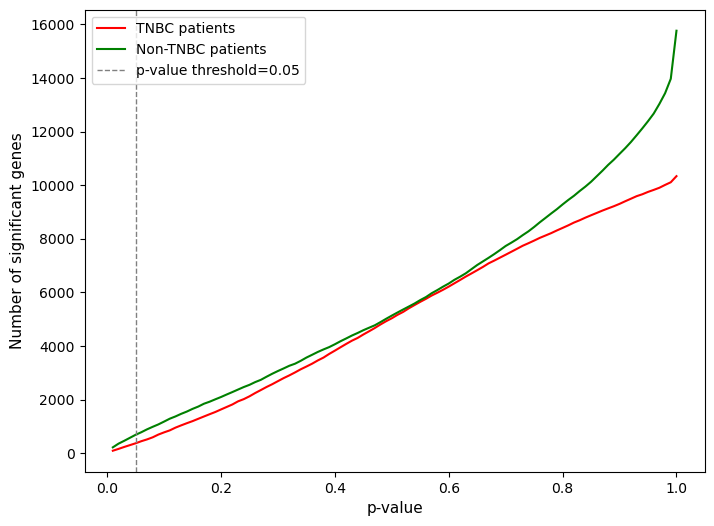

In [36]:
grafico_pval = Grafico(df_n_relevant_genes_pval_TN, df_n_relevant_genes_pval_NONTN)

NOTE: the genes with p-value equal to 1 are excluded. 

- The total number of genes with p-value<1 in the Triple-negative dataset are 12253
- The total number of genes with p-value<1 in the Triple-negative dataset are 15463

In [37]:
df_n_relevant_genes_pval_TN.head(10)

,P-value,Significant genes
0,0.01,90
1,0.02,158
2,0.03,231
3,0.04,299
4,0.05,367
5,0.06,445
6,0.07,512
7,0.08,590
8,0.09,693
9,0.10,775


In [38]:
# how many genes have a p-value<0.1?
print('Significant genes with a p_value<0.1 - Triple-Negative - Total dataset:', df_n_relevant_genes_pval_TN.loc[9, 'Significant genes'])
print('Significant genes with a p_value<0.1 - NON Triple-Negative - Total dataset:', df_n_relevant_genes_pval_NONTN.loc[9, 'Significant genes'])

Significant genes with a p_value<0.1 - Triple-Negative - Total dataset: 775
Significant genes with a p_value<0.1 - NON Triple-Negative - Total dataset: 1177


In [39]:
# how many genes have a p-value<0.05?
print('Significant genes with a p_value<0.05 - Triple-Negative - Total dataset:', df_n_relevant_genes_pval_TN.loc[4, 'Significant genes'])
print('Significant genes with a p_value<0.05 - NON Triple-Negative - Total dataset:', df_n_relevant_genes_pval_NONTN.loc[4, 'Significant genes'])

Significant genes with a p_value<0.05 - Triple-Negative - Total dataset: 367
Significant genes with a p_value<0.05 - NON Triple-Negative - Total dataset: 684


## Common genes between the two datasets with p-value < 0.05

In [40]:
genes_TN_pval_005 = Genes_selection_based_on_pv(mutsig_TN, 0.05)
genes_TN_pval_005

['TP53',
 'RB1',
 'PIK3CA',
 'FBXW7',
 'PTEN',
 'BRCA1',
 'CDKN2A',
 'MYL10',
 'ZKSCAN1',
 'MGAT5B',
 'MAML3',
 'NOTCH2',
 'NBN',
 'STAB2',
 'RAB42',
 'ATG4C',
 'PIK3R1',
 'C6orf118',
 'LZTR1',
 'MTMR12',
 'NUP153',
 'COIL',
 'ZNF195',
 'PSKH1',
 'CCRL2',
 'CREBBP',
 'NAA50',
 'AMZ1',
 'CACNA1S',
 'DDOST',
 'C8orf31',
 'MEFV',
 'RC3H2',
 'CDC20',
 'BAP1',
 'NOD2',
 'GP2',
 'ZNF500',
 'STK10',
 'CTCF',
 'CHRNB2',
 'TMPRSS13',
 'FAM166B',
 'GALNTL5',
 'NPAS4',
 'WBSCR27',
 'STAG2',
 'ZMIZ1',
 'FANCG',
 'ARHGAP5',
 'WDR62',
 'USP8',
 'GRPEL2',
 'NDRG1',
 'LARP4B',
 'GOLGA3',
 'RDH5',
 'TRIM14',
 'USP9X',
 'CEACAM3',
 'KDM6A',
 'PDLIM4',
 'SPPL3',
 'LDLR',
 'GPR97',
 'SIN3B',
 'PRB4',
 'ADAM30',
 'TSKS',
 'RBM47',
 'NPEPPS',
 'KMT2C',
 'SMTNL1',
 'NAGK',
 'ERCC5',
 'SCAPER',
 'TRPV5',
 'SERPINA4',
 'VPS9D1',
 'KNG1',
 'STAT1',
 'FANK1',
 'LOR',
 'TNRC6A',
 'BMPR2',
 'SETDB1',
 'CACNA1F',
 'CALB2',
 'CRYBA1',
 'FLII',
 'CYHR1',
 'TANC1',
 'COL6A6',
 'TRAPPC10',
 'TMED6',
 'SLAMF9',
 'TFIP11

In [41]:
len(genes_TN_pval_005)

367

In [42]:
genes_TN_pval_005_df = pd.DataFrame(genes_TN_pval_005, columns=['Genes'])
genes_TN_pval_005_df

,Genes
0,TP53
1,RB1
2,PIK3CA
3,FBXW7
4,PTEN
...,...
362,MCF2L2
363,ADRBK2
364,SUCO
365,XRN1


In [43]:
os.chdir("C:/Users/Cristina/OneDrive/Documenti/BCG/Tesi/Significant genes_definitivo")
genes_TN_pval_005_df.to_csv('significant_genes_onlyTN_pval_005_definitivo.csv', index=False, sep='\t')

In [44]:
genes_NONTN_pval_005 = Genes_selection_based_on_pv(mutsig_NONTN, 0.05)
genes_NONTN_pval_005

['PIK3CA',
 'TP53',
 'GATA3',
 'MAP2K4',
 'MAP3K1',
 'CDH1',
 'KMT2C',
 'CBFB',
 'AKT1',
 'NCOR1',
 'ARID1A',
 'PTEN',
 'ESR1',
 'ZKSCAN1',
 'ZNF19',
 'SPEN',
 'MYH9',
 'TBX3',
 'CTCF',
 'KRAS',
 'NF1',
 'FAM208B',
 'GPS2',
 'SF3B1',
 'ATM',
 'CDKN1B',
 'ERBB2',
 'RBM27',
 'COIL',
 'BRCA2',
 'OR5K4',
 'SPRED2',
 'RUNX1',
 'MEN1',
 'ERBB3',
 'MYL10',
 'RB1',
 'HIST1H3B',
 'CHD9',
 'KIAA0195',
 'NOTCH2',
 'ASXL2',
 'PIK3R1',
 'KMT2E',
 'RAD54B',
 'BPIFB2',
 'ZNF208',
 'E2F4',
 'TARBP2',
 'PRB2',
 'LIPH',
 'FANCD2',
 'PLK2',
 'USP8',
 'SP3',
 'MAML3',
 'HCFC2',
 'PLTP',
 'FAM49B',
 'NUP93',
 'TFDP1',
 'PTPN22',
 'SYBU',
 'DIAPH1',
 'PODXL',
 'FIGNL1',
 'CXorf38',
 'ORC2',
 'RIC8A',
 'PNN',
 'TSC1',
 'PRKCZ',
 'MYB',
 'ACLY',
 'FHDC1',
 'SLFN13',
 'RABEP1',
 'MBD6',
 'MAP4K1',
 'ACACB',
 'SNX16',
 'MCRS1',
 'RSBN1L',
 'MTHFD1L',
 'TAF7L',
 'XPO4',
 'NIPBL',
 'METTL7B',
 'SEC63',
 'FOXP1',
 'SLC45A1',
 'SUPT16H',
 'LPCAT4',
 'ANKHD1',
 'COL17A1',
 'DAP3',
 'DOCK11',
 'ZNF814',
 'CUL7',
 'SM

In [45]:
len(genes_NONTN_pval_005)

684

In [46]:
genes_NONTN_pval_005_df = pd.DataFrame(genes_NONTN_pval_005, columns=['Genes'])
genes_NONTN_pval_005_df

,Genes
0,PIK3CA
1,TP53
2,GATA3
3,MAP2K4
4,MAP3K1
...,...
679,TM2D1
680,TRAF6
681,HSPBAP1
682,FERMT2


In [47]:
os.chdir("C:/Users/Cristina/OneDrive/Documenti/BCG/Tesi/Significant genes_definitivo")
genes_NONTN_pval_005_df.to_csv('significant_genes_onlyNONTN_pval_005_definitivo.csv', index=False, sep='\t')

In [48]:
# define a function to select the common elements (genes in this case) between two lists
def Genes_in_common(genes_TN, genes_NONTN):
    return list(set(genes_TN) & set(genes_NONTN))

In [49]:
genes_in_common_pval_005 = Genes_in_common(genes_TN_pval_005, genes_NONTN_pval_005)
genes_in_common_pval_005

['USP8',
 'NOTCH2',
 'CCAR1',
 'FAM166B',
 'MYL10',
 'NUP153',
 'KMT2C',
 'TSC1',
 'GPATCH4',
 'DNAH10',
 'BRCA2',
 'CTCF',
 'SPP1',
 'AKT1',
 'ZKSCAN1',
 'MBD6',
 'SETDB1',
 'BMPR2',
 'RB1',
 'MAML3',
 'COIL',
 'ZNF195',
 'PIK3CA',
 'STAG2',
 'PIK3R1',
 'PTEN',
 'TP53',
 'LRRC16B',
 'ASXL2',
 'CLN3',
 'MATN4',
 'SUCO',
 'ARID1A',
 'TRAPPC10']

In [50]:
len(genes_in_common_pval_005)

34

In [51]:
print ('The genes in common between TN and NON TN in the total dataset with p-value < 0.05 are:', len(genes_in_common_pval_005))

The genes in common between TN and NON TN in the total dataset with p-value < 0.05 are: 34


In [52]:
# define a function to select the genes not in common between two datasets (logic: total dataset - common genes)
def Genes_not_in_common(total_genes, common_genes):
    return list(set(total_genes) - set(common_genes))

In [53]:
genes_not_in_common_pval_only_TN_005 = Genes_not_in_common(genes_TN_pval_005, genes_in_common_pval_005)
genes_not_in_common_pval_only_TN_005

['ALK',
 'PPARG',
 'ASCC2',
 'AKAP4',
 'ETFB',
 'ZNF311',
 'FANK1',
 'FILIP1L',
 'AMZ1',
 'UBAP1',
 'DPP8',
 'RC3H2',
 'POGZ',
 'COL6A6',
 'TRIM14',
 'NCCRP1',
 'DDX42',
 'NAV3',
 'CDC20',
 'ZBTB24',
 'CXorf23',
 'LARP4B',
 'GPR144',
 'CD93',
 'RPL18',
 'BATF',
 'MFSD3',
 'PLEKHH2',
 'OR4X2',
 'TSKS',
 'SPTAN1',
 'DNMT3L',
 'MUSK',
 'TAAR5',
 'MTMR12',
 'HERC1',
 'CPEB1',
 'CACNA1F',
 'B4GALNT3',
 'FBXW7',
 'LDLR',
 'GLS',
 'TECR',
 'SEC24B',
 'TNRC6C',
 'LGALS14',
 'UPF1',
 'SMTNL1',
 'SLC1A7',
 'NASP',
 'TACC3',
 'SERPINA4',
 'CAST',
 'XRN1',
 'STK31',
 'LRRC37A3',
 'LOR',
 'WBSCR27',
 'DUSP18',
 'FANCG',
 'C11orf85',
 'PARP9',
 'NCMAP',
 'HERC4',
 'SREBF1',
 'DDX55',
 'ZMIZ1',
 'FAH',
 'KRTAP9-8',
 'TULP4',
 'TFPI2',
 'MARC1',
 'XPO5',
 'RNF220',
 'ZC3HC1',
 'CCNE2',
 'COL6A3',
 'ACSM5',
 'MUC4',
 'TRMT1L',
 'SCAPER',
 'TRPV5',
 'PLOD1',
 'ATRX',
 'OSR2',
 'HNRNPUL1',
 'ACTG1',
 'ZNF500',
 'HRAS',
 'RBM47',
 'E2F7',
 'TSTA3',
 'TNRC6A',
 'ERCC5',
 'SNAP23',
 'C6orf118',
 'COL24A1',


In [54]:
num_genes_not_in_common_pval_only_TN_005 = len(genes_not_in_common_pval_only_TN_005)
num_genes_not_in_common_pval_only_TN_005

333

In [55]:
genes_not_in_common_pval_only_NONTN_005 = Genes_not_in_common(genes_NONTN_pval_005, genes_in_common_pval_005)
genes_not_in_common_pval_only_NONTN_005

['CHRM1',
 'EPHX3',
 'CAPN2',
 'ABCB9',
 'GSAP',
 'INADL',
 'SFMBT2',
 'APEX2',
 'PRAMEF2',
 'CHAF1A',
 'ZW10',
 'LPCAT4',
 'GRB7',
 'SLC4A2',
 'MLLT4',
 'WDR38',
 'KRAS',
 'COL17A1',
 'CTPS2',
 'OR6B1',
 'ICOSLG',
 'PSIP1',
 'TTLL12',
 'EIF4A2',
 'SLC26A9',
 'ORC2',
 'NUMA1',
 'FBXO18',
 'TLR4',
 'PHF1',
 'ACSBG1',
 'WDR47',
 'PIK3C2A',
 'ATM',
 'PCDHA10',
 'KMO',
 'F2RL2',
 'PPFIA4',
 'PIAS2',
 'OAS2',
 'ZC3H11A',
 'SCPEP1',
 'FERMT2',
 'CLEC1A',
 'CDK19',
 'KIF5B',
 'ZNRF4',
 'CTSO',
 'EPHB2',
 'GRM2',
 'TBL1XR1',
 'SMTNL2',
 'RIF1',
 'RALGAPA1',
 'OR7C1',
 'GPRIN1',
 'DYSF',
 'ASB11',
 'GAS8',
 'FAM96A',
 'FAM193A',
 'UQCR10',
 'MAP3K1',
 'CSNK2B',
 'ZNF554',
 'ANKRD28',
 'STON2',
 'SF3B3',
 'CA14',
 'MEN1',
 'BOLA1',
 'FAM227B',
 'NAA15',
 'MEF2A',
 'CHD9',
 'RPGRIP1',
 'RBM27',
 'ZNF672',
 'ZMIZ2',
 'MC4R',
 'SNAPC1',
 'ZBTB11',
 'KCNB2',
 'GNPTAB',
 'MUC17',
 'KIAA0907',
 'KIAA1109',
 'KLF4',
 'ULBP2',
 'ZNF716',
 'RPL5',
 'RSPH4A',
 'GUCY2C',
 'OR7A10',
 'KIAA0195',
 'SORT1',
 

In [56]:
num_genes_not_in_common_pval_only_NONTN_005 = len(genes_not_in_common_pval_only_NONTN_005)
num_genes_not_in_common_pval_only_NONTN_005

650

In [57]:
print ('Genes not in common only TN - Total dataset with p-value < 0.05:', num_genes_not_in_common_pval_only_TN_005)
print ('Genes not in common only NON TN - Total dataset with p-value < 0.05:', num_genes_not_in_common_pval_only_NONTN_005)

Genes not in common only TN - Total dataset with p-value < 0.05: 333
Genes not in common only NON TN - Total dataset with p-value < 0.05: 650


In [58]:
# total sum of the genes not in common 
genes_not_in_common_pval_005_sum = genes_not_in_common_pval_only_TN_005 + genes_not_in_common_pval_only_NONTN_005

In [59]:
print('Sum of the genes not in common - Total dataset with p-value < 0.05:', len(genes_not_in_common_pval_005_sum))

Sum of the genes not in common - Total dataset with p-value < 0.05: 983


In [60]:
# define a function to plot the distribution of the number of significant genes as the pvalue varies, zoomed on p-value=0.05
def Grafico_pval_zoom(df_n_rel_pval_TN, df_n_rel_pval_NONTN, caso):
    casistica_titolo = 'Significant genes as the p-value varies - XXX - ZOOM at p-value 0.05'
    casistica_titolo = casistica_titolo.replace('XXX',caso)
    casistica_legenda_TN = 'Triple-negative patients - XXX'
    casistica_legenda_TN = casistica_legenda_TN.replace('XXX', caso)
    casistica_legenda_NONTN = 'Non Triple-negative patients - XXX'
    casistica_legenda_NONTN = casistica_legenda_NONTN.replace('XXX', caso)
    
    df_n_rel_pval_TN_copy = df_n_rel_pval_TN.copy()
    df_n_rel_pval_TN_copy = df_n_rel_pval_TN_copy.set_index('P-value')
    df_n_rel_pval_NONTN_copy = df_n_rel_pval_NONTN.copy()
    df_n_rel_pval_NONTN_copy = df_n_rel_pval_NONTN_copy.set_index('P-value')
    
    plt.rcParams['figure.figsize'] = (10, 8)
    plt.plot(df_n_rel_pval_TN_copy, label = casistica_legenda_TN, color = 'red')
    plt.plot(df_n_rel_pval_NONTN_copy, label = casistica_legenda_NONTN, color = 'green')
    plt.xlabel('P-value', fontsize=13)
    plt.ylabel('Number of significant genes', fontsize=13)
    plt.legend(loc='lower left', bbox_to_anchor=(0.0, -0.2), fontsize='large')
    plt.axvline(x=0.05, color='black', linestyle='--', linewidth = 1)
    plt.xlim(0.01, 0.1)
    plt.ylim(0, 1400)
    plt.title(casistica_titolo,fontsize= 18)

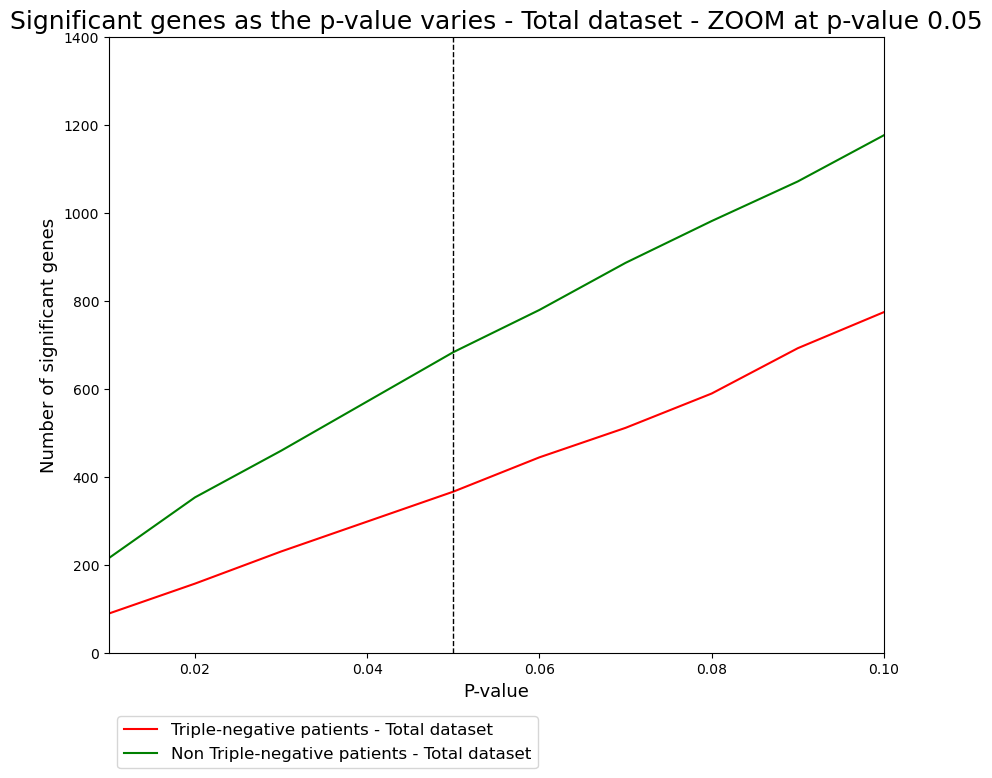

In [61]:
grafico_pval_zoom = Grafico_pval_zoom(df_n_relevant_genes_pval_TN, df_n_relevant_genes_pval_NONTN, 'Total dataset')

NOTE: 
- the significant genes with p-value < 0.05 are 367 for the Triple-negative patients
- the significant genes with p-value < 0.05 are 684 for the NON Triple-negative patients

## 2) Selection of genes based on q-value

**RelGeneQ** : function that creates a vector containing values from 0.01 to 1 (with an interval of 0.01), in which each value is associated to the number of genes with q-value lower than the value itself.

In [62]:
def RelGeneQ(df):
    n_rel = {}
    for i in np.arange(0.01, 1.01, 0.01):
        n_rel[i]=len((df[df.q<i].gene))
    return(n_rel)

In [63]:
n_relevant_genes_qval_TN = RelGeneQ(mutsig_TN)
n_relevant_genes_qval_TN

{0.01: 7,
 0.02: 9,
 0.03: 9,
 0.04: 9,
 0.05: 9,
 0.060000000000000005: 10,
 0.06999999999999999: 11,
 0.08: 11,
 0.09: 12,
 0.09999999999999999: 12,
 0.11: 12,
 0.12: 12,
 0.13: 12,
 0.14: 12,
 0.15000000000000002: 12,
 0.16: 12,
 0.17: 12,
 0.18000000000000002: 12,
 0.19: 12,
 0.2: 13,
 0.21000000000000002: 13,
 0.22: 15,
 0.23: 15,
 0.24000000000000002: 15,
 0.25: 15,
 0.26: 15,
 0.27: 15,
 0.28: 15,
 0.29000000000000004: 15,
 0.3: 15,
 0.31: 15,
 0.32: 15,
 0.33: 15,
 0.34: 15,
 0.35000000000000003: 15,
 0.36000000000000004: 15,
 0.37: 15,
 0.38: 15,
 0.39: 15,
 0.4: 15,
 0.41000000000000003: 15,
 0.42000000000000004: 15,
 0.43: 15,
 0.44: 15,
 0.45: 15,
 0.46: 15,
 0.47000000000000003: 15,
 0.48000000000000004: 15,
 0.49: 15,
 0.5: 15,
 0.51: 15,
 0.52: 15,
 0.53: 16,
 0.54: 16,
 0.55: 16,
 0.56: 16,
 0.5700000000000001: 16,
 0.5800000000000001: 16,
 0.59: 16,
 0.6: 16,
 0.61: 16,
 0.62: 18,
 0.63: 19,
 0.64: 19,
 0.65: 19,
 0.66: 19,
 0.67: 19,
 0.68: 19,
 0.6900000000000001: 19

Only 23 genes have a q-value<1 in the Triple-negative dataset.

In [64]:
n_relevant_genes_qval_NONTN = RelGeneQ(mutsig_NONTN)  
n_relevant_genes_qval_NONTN

{0.01: 35,
 0.02: 37,
 0.03: 40,
 0.04: 43,
 0.05: 52,
 0.060000000000000005: 54,
 0.06999999999999999: 55,
 0.08: 57,
 0.09: 57,
 0.09999999999999999: 57,
 0.11: 60,
 0.12: 60,
 0.13: 63,
 0.14: 64,
 0.15000000000000002: 64,
 0.16: 64,
 0.17: 66,
 0.18000000000000002: 67,
 0.19: 68,
 0.2: 69,
 0.21000000000000002: 72,
 0.22: 76,
 0.23: 81,
 0.24000000000000002: 81,
 0.25: 82,
 0.26: 84,
 0.27: 85,
 0.28: 91,
 0.29000000000000004: 93,
 0.3: 94,
 0.31: 97,
 0.32: 97,
 0.33: 104,
 0.34: 104,
 0.35000000000000003: 105,
 0.36000000000000004: 106,
 0.37: 108,
 0.38: 115,
 0.39: 116,
 0.4: 117,
 0.41000000000000003: 120,
 0.42000000000000004: 122,
 0.43: 122,
 0.44: 122,
 0.45: 123,
 0.46: 124,
 0.47000000000000003: 128,
 0.48000000000000004: 129,
 0.49: 130,
 0.5: 131,
 0.51: 132,
 0.52: 132,
 0.53: 134,
 0.54: 136,
 0.55: 138,
 0.56: 140,
 0.5700000000000001: 143,
 0.5800000000000001: 143,
 0.59: 144,
 0.6: 144,
 0.61: 148,
 0.62: 148,
 0.63: 148,
 0.64: 148,
 0.65: 150,
 0.66: 150,
 0.67:

Only 298 genes have a q-value<1 in the NON Triple-negative dataset.

In [65]:
# convert the dictionary into a dataframe 
df_n_relevant_genes_qval_TN = pd.DataFrame.from_dict(n_relevant_genes_qval_TN, orient='index')
df_n_relevant_genes_qval_TN.rename(columns={0: "Significant genes"}, inplace=True)
df_n_relevant_genes_qval_TN.reset_index(level=0, inplace=True)
df_n_relevant_genes_qval_TN.rename(columns={"index": "Q-value"}, inplace=True)
df_n_relevant_genes_qval_TN

,Q-value,Significant genes
0,0.01,7
1,0.02,9
2,0.03,9
3,0.04,9
4,0.05,9
...,...,...
95,0.96,23
96,0.97,23
97,0.98,23
98,0.99,23


In [66]:
# convert the dictionary into a dataframe 
df_n_relevant_genes_qval_NONTN = pd.DataFrame.from_dict(n_relevant_genes_qval_NONTN, orient='index')
df_n_relevant_genes_qval_NONTN.rename(columns={0: "Significant genes"}, inplace=True)
df_n_relevant_genes_qval_NONTN.reset_index(level=0, inplace=True)
df_n_relevant_genes_qval_NONTN.rename(columns={"index": "Q-value"}, inplace=True)
df_n_relevant_genes_qval_NONTN

,Q-value,Significant genes
0,0.01,35
1,0.02,37
2,0.03,40
3,0.04,43
4,0.05,52
...,...,...
95,0.96,278
96,0.97,281
97,0.98,288
98,0.99,289


## Plot the number of significant genes as the q-value varies

Define a function to plot the number of significant genes as the q-value varies.

In [67]:
def Grafico_Q (df_n_rel_qval_TN, df_n_rel_qval_NONTN):
    casistica_titolo = 'Significant genes as the q-value varies - XXX'
    casistica_titolo = casistica_titolo.replace('XXX', '')
    casistica_legenda_TN = 'TNBC XXX'
    casistica_legenda_TN = casistica_legenda_TN.replace('XXX', '')
    casistica_legenda_NONTN = 'Non-TNBC XXX'
    casistica_legenda_NONTN = casistica_legenda_NONTN.replace('XXX', '')
    
    df_n_rel_qval_TN_copy = df_n_rel_qval_TN.copy()
    df_n_rel_qval_TN_copy = df_n_rel_qval_TN_copy.set_index('Q-value')
    df_n_rel_qval_NONTN_copy = df_n_rel_qval_NONTN.copy()
    df_n_rel_qval_NONTN_copy = df_n_rel_qval_NONTN_copy.set_index('Q-value')
    
    plt.rcParams['figure.figsize'] = (8, 6)
    plt.plot(df_n_rel_qval_TN_copy, label = casistica_legenda_TN, color = 'red')
    plt.plot(df_n_rel_qval_NONTN_copy, label = casistica_legenda_NONTN, color = 'green')
    
    plt.axvline(x=1, color='black', linestyle='--', linewidth=1, label='q-value threshold=1')
    plt.axvline(x=0.1, color='grey', linestyle='--', linewidth=1, label='q-value threshold=0.1')
    
    plt.xlabel('q-value', fontsize=11)
    plt.ylabel('Number of significant genes', fontsize=11)
    plt.legend(loc='upper left', fontsize=10)
    #plt.title(casistica_titolo,fontsize= 18)

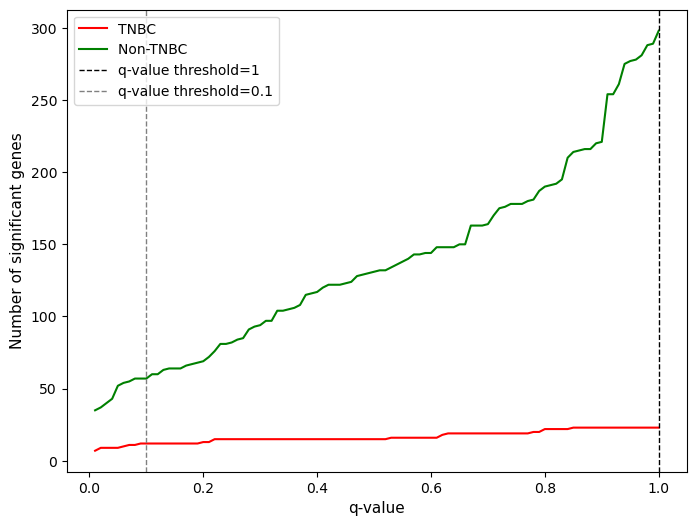

In [68]:
grafico_qval = Grafico_Q(df_n_relevant_genes_qval_TN, df_n_relevant_genes_qval_NONTN)

NOTE: the genes with q-value equal to 1 are excluded. 

- The total number of genes with q-value<1 in the Triple-negative dataset are 23
- The total number of genes with q-value<1 in the Triple-negative dataset are 298

In [69]:
df_n_relevant_genes_qval_TN.head(10)

,Q-value,Significant genes
0,0.01,7
1,0.02,9
2,0.03,9
3,0.04,9
4,0.05,9
5,0.06,10
6,0.07,11
7,0.08,11
8,0.09,12
9,0.10,12


In [70]:
df_n_relevant_genes_qval_NONTN.head(10)

,Q-value,Significant genes
0,0.01,35
1,0.02,37
2,0.03,40
3,0.04,43
4,0.05,52
5,0.06,54
6,0.07,55
7,0.08,57
8,0.09,57
9,0.10,57


In [71]:
# define a function to plot the distribution of the number of significant genes as the q-value varies, zoomed on q-value=0.1
def Grafico_qval_zoom (df_n_rel_qval_TN, df_n_rel_qval_NONTN, caso):
    casistica_titolo = 'Significant genes as the q-value varies - XXX - ZOOM at q-value 0.1'
    casistica_titolo = casistica_titolo.replace('XXX',caso)
    casistica_legenda_TN = 'Triple-negative patients - XXX'
    casistica_legenda_TN = casistica_legenda_TN.replace('XXX', caso)
    casistica_legenda_NONTN = 'Non Triple-negative patients - XXX'
    casistica_legenda_NONTN = casistica_legenda_NONTN.replace('XXX', caso)
    
    df_n_rel_qval_TN_copy = df_n_rel_qval_TN.copy()
    df_n_rel_qval_TN_copy = df_n_rel_qval_TN_copy.set_index('Q-value')
    df_n_rel_qval_NONTN_copy = df_n_rel_qval_NONTN.copy()
    df_n_rel_qval_NONTN_copy = df_n_rel_qval_NONTN_copy.set_index('Q-value')
    
    plt.plot(df_n_rel_qval_TN_copy, label = casistica_legenda_TN, color = 'red')
    plt.plot(df_n_rel_qval_NONTN_copy, label = casistica_legenda_NONTN, color = 'green')
    plt.xlabel('Q-value', fontsize=13)
    plt.ylabel('Number of significant genes', fontsize=13)
    plt.legend(loc='lower left', bbox_to_anchor=(0.0, -0.2), fontsize='large')
    plt.axvline(x=0.1, color='black', linestyle='--', linewidth = 1)
    plt.xlim(0.01, 0.2)
    plt.ylim(0, 100)
    plt.title(casistica_titolo,fontsize= 18)

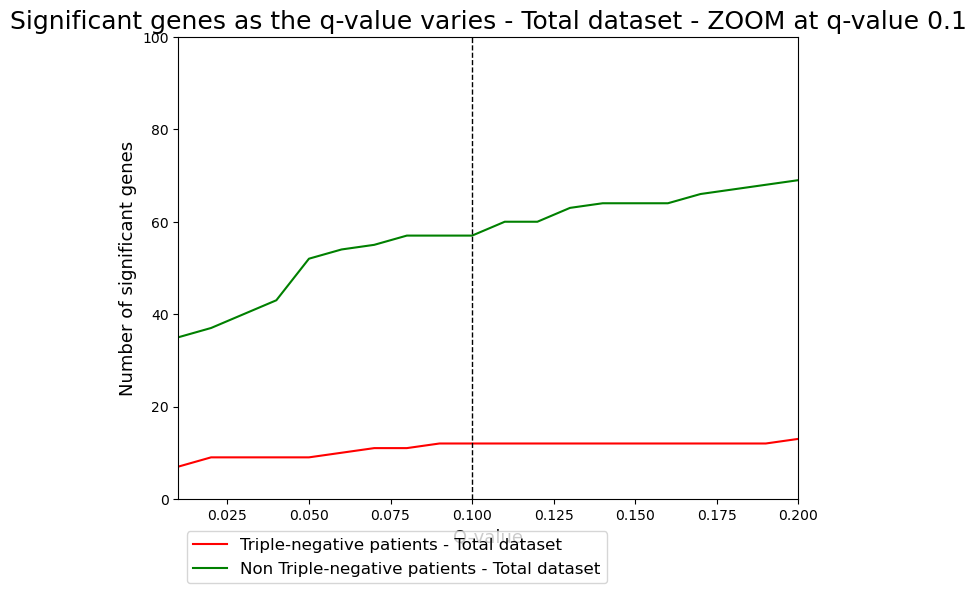

In [72]:
grafico_qval_zoom = Grafico_qval_zoom(df_n_relevant_genes_qval_TN, df_n_relevant_genes_qval_NONTN, 'Total dataset')

NOTE: 
- the significant genes with q-value < 0.10 are 12 for the Triple-negative patients
- the significant genes with q-value < 0.10 are 57 for the NON Triple-negative patients

**Genes_selection_based_on_qv**: function that creates a vector containing a list of genes with q-value less than the value given in input to the function.

In [73]:
# define a function to select genes according to the q-value
def Genes_selection_based_on_qv (df, qv01):
    n_rel01 = []

    for index,row in df.iterrows():
        name = row.gene
        q = row.q
        if q < qv01:
            n_rel01.append(name)

    return (n_rel01)

In [74]:
# select the genes with q-value<1 (Triple-negative patients)
genes_TN_qval_1 = Genes_selection_based_on_qv(mutsig_TN, 1)
genes_TN_qval_1

['TP53',
 'RB1',
 'PIK3CA',
 'FBXW7',
 'PTEN',
 'BRCA1',
 'CDKN2A',
 'MYL10',
 'ZKSCAN1',
 'MGAT5B',
 'MAML3',
 'NOTCH2',
 'NBN',
 'STAB2',
 'RAB42',
 'ATG4C',
 'PIK3R1',
 'C6orf118',
 'LZTR1',
 'MTMR12',
 'NUP153',
 'COIL',
 'ZNF195']

In [75]:
len(genes_TN_qval_1)

23

In [76]:
# convert the list into a dataframe
genes_TN_qval_1_df = pd.DataFrame(genes_TN_qval_1, columns=['Hugo_Symbol'])
genes_TN_qval_1_df

,Hugo_Symbol
0,TP53
1,RB1
2,PIK3CA
3,FBXW7
4,PTEN
5,BRCA1
6,CDKN2A
7,MYL10
8,ZKSCAN1
9,MGAT5B


In [77]:
os.chdir("C:/Users/Cristina/OneDrive/Documenti/BCG/Tesi/Significant genes_definitivo")
genes_TN_qval_1_df.to_csv('significant_genes_onlyTN_qval_1_definitivo.csv', index=False, sep='\t')

In [78]:
# select the genes with q-value<1 (NON Triple-negative patients)
genes_NONTN_qval_1 = Genes_selection_based_on_qv(mutsig_NONTN, 1)
genes_NONTN_qval_1

['PIK3CA',
 'TP53',
 'GATA3',
 'MAP2K4',
 'MAP3K1',
 'CDH1',
 'KMT2C',
 'CBFB',
 'AKT1',
 'NCOR1',
 'ARID1A',
 'PTEN',
 'ESR1',
 'ZKSCAN1',
 'ZNF19',
 'SPEN',
 'MYH9',
 'TBX3',
 'CTCF',
 'KRAS',
 'NF1',
 'FAM208B',
 'GPS2',
 'SF3B1',
 'ATM',
 'CDKN1B',
 'ERBB2',
 'RBM27',
 'COIL',
 'BRCA2',
 'OR5K4',
 'SPRED2',
 'RUNX1',
 'MEN1',
 'ERBB3',
 'MYL10',
 'RB1',
 'HIST1H3B',
 'CHD9',
 'KIAA0195',
 'NOTCH2',
 'ASXL2',
 'PIK3R1',
 'KMT2E',
 'RAD54B',
 'BPIFB2',
 'ZNF208',
 'E2F4',
 'TARBP2',
 'PRB2',
 'LIPH',
 'FANCD2',
 'PLK2',
 'USP8',
 'SP3',
 'MAML3',
 'HCFC2',
 'PLTP',
 'FAM49B',
 'NUP93',
 'TFDP1',
 'PTPN22',
 'SYBU',
 'DIAPH1',
 'PODXL',
 'FIGNL1',
 'CXorf38',
 'ORC2',
 'RIC8A',
 'PNN',
 'TSC1',
 'PRKCZ',
 'MYB',
 'ACLY',
 'FHDC1',
 'SLFN13',
 'RABEP1',
 'MBD6',
 'MAP4K1',
 'ACACB',
 'SNX16',
 'MCRS1',
 'RSBN1L',
 'MTHFD1L',
 'TAF7L',
 'XPO4',
 'NIPBL',
 'METTL7B',
 'SEC63',
 'FOXP1',
 'SLC45A1',
 'SUPT16H',
 'LPCAT4',
 'ANKHD1',
 'COL17A1',
 'DAP3',
 'DOCK11',
 'ZNF814',
 'CUL7',
 'SM

In [79]:
len(genes_NONTN_qval_1)

298

In [80]:
# convert the list into a dataframe
genes_NONTN_qval_1_df = pd.DataFrame(genes_NONTN_qval_1, columns=['Hugo_Symbol'])
genes_NONTN_qval_1_df

,Hugo_Symbol
0,PIK3CA
1,TP53
2,GATA3
3,MAP2K4
4,MAP3K1
...,...
293,SF3B3
294,GRM2
295,FAM193A
296,TFAP2A


In [81]:
os.chdir("C:/Users/Cristina/OneDrive/Documenti/BCG/Tesi/Significant genes_definitivo")
genes_NONTN_qval_1_df.to_csv('significant_genes_onlyNONTN_qval_1_definitivo.csv', index=False, sep='\t')

In [82]:
# select only the genes NOT in common between the two datasets
x = pd.concat([genes_TN_qval_1_df, genes_NONTN_qval_1_df])
genes_TNandNONTN_qval_1 = x.drop_duplicates(keep="first", inplace=False).copy()
genes_TNandNONTN_qval_1

,Hugo_Symbol
0,TP53
1,RB1
2,PIK3CA
3,FBXW7
4,PTEN
...,...
293,SF3B3
294,GRM2
295,FAM193A
296,TFAP2A


In [83]:
# save this dataset 
os.chdir("C:/Users/Cristina/OneDrive/Documenti/BCG/Tesi/Significant genes_definitivo")
genes_TNandNONTN_qval_1.to_csv("significant_genes_totalTNandNONTN_qval_1_definitivo.csv", index=False, sep='\t')

In [84]:
# common genes between TN and non TN significant genes (q-value<1)
genes_in_common_qval_1 = Genes_in_common(genes_TN_qval_1, genes_NONTN_qval_1)
genes_in_common_qval_1_df = pd.DataFrame(genes_in_common_qval_1, columns=['Hugo_Symbol'])
genes_in_common_qval_1_df

,Hugo_Symbol
0,RB1
1,NOTCH2
2,MAML3
3,COIL
4,ZNF195
5,PIK3CA
6,MYL10
7,NUP153
8,PIK3R1
9,ZKSCAN1


In [85]:
# save this dataset 
os.chdir("C:/Users/Cristina/OneDrive/Documenti/BCG/Tesi/Significant genes_definitivo")
genes_TNandNONTN_qval_1.to_csv("significant_genes_totalTNandNONTN_qval_1_definitivo.csv", index=False, sep='\t')

In [86]:
genes_TNandNONTN_qval_1.duplicated().any()

False

In [87]:
# select the genes with q-value<0.1 (Triple-negative patients)
genes_TN_qval_01 = Genes_selection_based_on_qv(mutsig_TN, 0.1)
genes_TN_qval_01

['TP53',
 'RB1',
 'PIK3CA',
 'FBXW7',
 'PTEN',
 'BRCA1',
 'CDKN2A',
 'MYL10',
 'ZKSCAN1',
 'MGAT5B',
 'MAML3',
 'NOTCH2']

In [88]:
len(genes_TN_qval_01)

12

In [89]:
# select the genes with q-value<0.1 (NON Triple-negative patients)
genes_NONTN_qval_01 = Genes_selection_based_on_qv(mutsig_NONTN, 0.1)
genes_NONTN_qval_01

['PIK3CA',
 'TP53',
 'GATA3',
 'MAP2K4',
 'MAP3K1',
 'CDH1',
 'KMT2C',
 'CBFB',
 'AKT1',
 'NCOR1',
 'ARID1A',
 'PTEN',
 'ESR1',
 'ZKSCAN1',
 'ZNF19',
 'SPEN',
 'MYH9',
 'TBX3',
 'CTCF',
 'KRAS',
 'NF1',
 'FAM208B',
 'GPS2',
 'SF3B1',
 'ATM',
 'CDKN1B',
 'ERBB2',
 'RBM27',
 'COIL',
 'BRCA2',
 'OR5K4',
 'SPRED2',
 'RUNX1',
 'MEN1',
 'ERBB3',
 'MYL10',
 'RB1',
 'HIST1H3B',
 'CHD9',
 'KIAA0195',
 'NOTCH2',
 'ASXL2',
 'PIK3R1',
 'KMT2E',
 'RAD54B',
 'BPIFB2',
 'ZNF208',
 'E2F4',
 'TARBP2',
 'PRB2',
 'LIPH',
 'FANCD2',
 'PLK2',
 'USP8',
 'SP3',
 'MAML3',
 'HCFC2']

In [90]:
len(genes_NONTN_qval_01)

57

### Common genes between the two datasets with q-value < 1

In [91]:
genes_in_common_qval_1 = Genes_in_common(genes_TN_qval_1, genes_NONTN_qval_1)
genes_in_common_qval_1

['RB1',
 'NOTCH2',
 'MAML3',
 'COIL',
 'ZNF195',
 'PIK3CA',
 'MYL10',
 'NUP153',
 'PIK3R1',
 'ZKSCAN1',
 'PTEN',
 'TP53']

In [92]:
len(genes_in_common_qval_1)

12

In [93]:
print ('The genes in common between TN and NON TN patients in the Total dataset with q-value < 1 are:', len(genes_in_common_qval_1))

The genes in common between TN and NON TN patients in the Total dataset with q-value < 1 are: 12


### Common genes between the two datasets with q-value < 0.1

In [94]:
genes_in_common_qval_01 = Genes_in_common(genes_TN_qval_01, genes_NONTN_qval_01)
genes_in_common_qval_01

['RB1', 'MAML3', 'NOTCH2', 'PIK3CA', 'MYL10', 'PTEN', 'TP53', 'ZKSCAN1']

In [95]:
print ('The genes in common between TN and NON TN patients in the Total dataset with q-value < 0.1 are:', len(genes_in_common_qval_01))

The genes in common between TN and NON TN patients in the Total dataset with q-value < 0.1 are: 8


### Uncommon genes between the two datasets with q-value < 1

In [96]:
genes_not_in_common_qval_only_TN_1 = Genes_not_in_common(genes_TN_qval_1, genes_in_common_qval_1)
genes_not_in_common_qval_only_TN_1

['MGAT5B',
 'RAB42',
 'FBXW7',
 'LZTR1',
 'C6orf118',
 'BRCA1',
 'STAB2',
 'MTMR12',
 'CDKN2A',
 'NBN',
 'ATG4C']

In [97]:
len(genes_not_in_common_qval_only_TN_1)

11

In [98]:
print ('Genes not in common only TN - Total dataset with q-value < 1:', len(genes_not_in_common_qval_only_TN_1))

Genes not in common only TN - Total dataset with q-value < 1: 11


In [99]:
genes_not_in_common_qval_only_NONTN_1 = Genes_not_in_common(genes_NONTN_qval_1, genes_in_common_qval_1)
genes_not_in_common_qval_only_NONTN_1

['CHRM1',
 'EPHX3',
 'CAPN2',
 'INADL',
 'AP1S3',
 'ZW10',
 'DOCK11',
 'HPD',
 'LPCAT4',
 'SLC28A2',
 'APLF',
 'SLC4A2',
 'KRAS',
 'COL17A1',
 'NKX3-2',
 'TRIP11',
 'HIST1H3D',
 'OR6B1',
 'ICOSLG',
 'PSIP1',
 'LRCH3',
 'ITPR3',
 'ZBTB48',
 'SLC26A9',
 'ORC2',
 'FOXA1',
 'FBXO18',
 'SIRT7',
 'WDR47',
 'PIK3C2A',
 'ATM',
 'TFAP2A',
 'CCNT1',
 'CDKN1B',
 'TRAPPC10',
 'CCDC82',
 'CDK19',
 'PRKCZ',
 'MED23',
 'SMG1',
 'GRM2',
 'TBL1XR1',
 'SMTNL2',
 'MTA2',
 'CBFB',
 'GPRIN1',
 'COL2A1',
 'ASH1L',
 'KIF1B',
 'GAS8',
 'FAM193A',
 'UQCR10',
 'MAP3K1',
 'KRT6B',
 'NCOR1',
 'SF3B3',
 'CA14',
 'MEN1',
 'SELP',
 'SNX16',
 'NAA15',
 'MYB',
 'CHD9',
 'RPGRIP1',
 'RBM27',
 'SMARCA1',
 'RABEP1',
 'SNAPC1',
 'RSBN1L',
 'LIPH',
 'ZNF208',
 'KIAA1109',
 'SPRED2',
 'SLC25A19',
 'KLF4',
 'ZNF716',
 'FASTKD2',
 'RPL5',
 'OSBPL8',
 'METTL7B',
 'DAP3',
 'KIAA0195',
 'PTGS2',
 'OSBPL1A',
 'KMT2E',
 'TRAF3',
 'PTCD3',
 'ACACB',
 'CCDC135',
 'AGO1',
 'SLC45A1',
 'ATL3',
 'COL5A3',
 'RCC2',
 'FKBP4',
 'GATA3',
 

In [100]:
len(genes_not_in_common_qval_only_NONTN_1)

286

In [101]:
print ('Genes not in common only NON TN - Total dataset with q-value < 1:', len(genes_not_in_common_qval_only_NONTN_1))

Genes not in common only NON TN - Total dataset with q-value < 1: 286


### Uncommon genes between the two datasets with q-value < 0.1

In [102]:
genes_not_in_common_qval_only_TN_01 = Genes_not_in_common(genes_TN_qval_01, genes_in_common_qval_01)
genes_not_in_common_qval_only_TN_01

['BRCA1', 'MGAT5B', 'FBXW7', 'CDKN2A']

In [103]:
print ('Genes not in common only TN - Total dataset with q-value < 0.1:', len(genes_not_in_common_qval_only_TN_01))

Genes not in common only TN - Total dataset with q-value < 0.1: 4


In [104]:
genes_not_in_common_qval_only_NONTN_01 = Genes_not_in_common(genes_NONTN_qval_01, genes_in_common_qval_01)
genes_not_in_common_qval_only_NONTN_01

['USP8',
 'LIPH',
 'SP3',
 'HCFC2',
 'NF1',
 'MAP2K4',
 'ZNF208',
 'SPRED2',
 'RUNX1',
 'KMT2C',
 'CDH1',
 'BRCA2',
 'CBFB',
 'RAD54B',
 'CTCF',
 'E2F4',
 'AKT1',
 'TBX3',
 'ERBB3',
 'KRAS',
 'MAP3K1',
 'KIAA0195',
 'HIST1H3B',
 'NCOR1',
 'GPS2',
 'ERBB2',
 'TARBP2',
 'PLK2',
 'BPIFB2',
 'MEN1',
 'SF3B1',
 'KMT2E',
 'COIL',
 'SPEN',
 'OR5K4',
 'PIK3R1',
 'PRB2',
 'GATA3',
 'CHD9',
 'ESR1',
 'RBM27',
 'ASXL2',
 'ATM',
 'FAM208B',
 'MYH9',
 'ARID1A',
 'ZNF19',
 'CDKN1B',
 'FANCD2']

In [105]:
print ('Genes not in common only NON TN - Total dataset with q-value < 0.1:', len(genes_not_in_common_qval_only_NONTN_01))

Genes not in common only NON TN - Total dataset with q-value < 0.1: 49


### Sum of the uncommon genes 

In [106]:
# q-value<1

genes_not_in_common_qval_1_sum = genes_not_in_common_qval_only_TN_1 + genes_not_in_common_qval_only_NONTN_1
genes_not_in_common_qval_1_sum

['MGAT5B',
 'RAB42',
 'FBXW7',
 'LZTR1',
 'C6orf118',
 'BRCA1',
 'STAB2',
 'MTMR12',
 'CDKN2A',
 'NBN',
 'ATG4C',
 'CHRM1',
 'EPHX3',
 'CAPN2',
 'INADL',
 'AP1S3',
 'ZW10',
 'DOCK11',
 'HPD',
 'LPCAT4',
 'SLC28A2',
 'APLF',
 'SLC4A2',
 'KRAS',
 'COL17A1',
 'NKX3-2',
 'TRIP11',
 'HIST1H3D',
 'OR6B1',
 'ICOSLG',
 'PSIP1',
 'LRCH3',
 'ITPR3',
 'ZBTB48',
 'SLC26A9',
 'ORC2',
 'FOXA1',
 'FBXO18',
 'SIRT7',
 'WDR47',
 'PIK3C2A',
 'ATM',
 'TFAP2A',
 'CCNT1',
 'CDKN1B',
 'TRAPPC10',
 'CCDC82',
 'CDK19',
 'PRKCZ',
 'MED23',
 'SMG1',
 'GRM2',
 'TBL1XR1',
 'SMTNL2',
 'MTA2',
 'CBFB',
 'GPRIN1',
 'COL2A1',
 'ASH1L',
 'KIF1B',
 'GAS8',
 'FAM193A',
 'UQCR10',
 'MAP3K1',
 'KRT6B',
 'NCOR1',
 'SF3B3',
 'CA14',
 'MEN1',
 'SELP',
 'SNX16',
 'NAA15',
 'MYB',
 'CHD9',
 'RPGRIP1',
 'RBM27',
 'SMARCA1',
 'RABEP1',
 'SNAPC1',
 'RSBN1L',
 'LIPH',
 'ZNF208',
 'KIAA1109',
 'SPRED2',
 'SLC25A19',
 'KLF4',
 'ZNF716',
 'FASTKD2',
 'RPL5',
 'OSBPL8',
 'METTL7B',
 'DAP3',
 'KIAA0195',
 'PTGS2',
 'OSBPL1A',
 'KMT2E',

In [107]:
len(genes_not_in_common_qval_1_sum)

297

The total uncommon genes considering a q-value < 1 are 297.

In [108]:
# q-value<0.1

genes_not_in_common_qval_01_sum = genes_not_in_common_qval_only_TN_01 + genes_not_in_common_qval_only_NONTN_01
genes_not_in_common_qval_01_sum

['BRCA1',
 'MGAT5B',
 'FBXW7',
 'CDKN2A',
 'USP8',
 'LIPH',
 'SP3',
 'HCFC2',
 'NF1',
 'MAP2K4',
 'ZNF208',
 'SPRED2',
 'RUNX1',
 'KMT2C',
 'CDH1',
 'BRCA2',
 'CBFB',
 'RAD54B',
 'CTCF',
 'E2F4',
 'AKT1',
 'TBX3',
 'ERBB3',
 'KRAS',
 'MAP3K1',
 'KIAA0195',
 'HIST1H3B',
 'NCOR1',
 'GPS2',
 'ERBB2',
 'TARBP2',
 'PLK2',
 'BPIFB2',
 'MEN1',
 'SF3B1',
 'KMT2E',
 'COIL',
 'SPEN',
 'OR5K4',
 'PIK3R1',
 'PRB2',
 'GATA3',
 'CHD9',
 'ESR1',
 'RBM27',
 'ASXL2',
 'ATM',
 'FAM208B',
 'MYH9',
 'ARID1A',
 'ZNF19',
 'CDKN1B',
 'FANCD2']

In [109]:
len(genes_not_in_common_qval_01_sum)

53

The total uncommon genes considering a q-value < 0.1 are 53.

## Selection of significant genes with p-value < 0.05 and q-value < 1

In [110]:
# 1) common genes 
genes_in_common_pval_005_qval_1_COMMON = Genes_in_common(genes_in_common_qval_1, genes_in_common_pval_005)
genes_in_common_pval_005_qval_1_COMMON

['RB1',
 'NOTCH2',
 'MAML3',
 'COIL',
 'ZNF195',
 'PIK3CA',
 'MYL10',
 'NUP153',
 'PIK3R1',
 'ZKSCAN1',
 'PTEN',
 'TP53']

In [111]:
# 2) uncommon genes - only in TN datasets
genes_in_common_pval_005_qval_1_ONLY_TN = Genes_in_common(genes_not_in_common_qval_only_TN_1, genes_not_in_common_pval_only_TN_005)
genes_in_common_pval_005_qval_1_ONLY_TN 

['MGAT5B',
 'RAB42',
 'FBXW7',
 'C6orf118',
 'LZTR1',
 'BRCA1',
 'STAB2',
 'MTMR12',
 'CDKN2A',
 'NBN',
 'ATG4C']

In [112]:
# 3) uncommon genes - only in NON TN datasets
genes_in_common_pval_005_qval_1_ONLY_NONTN = Genes_in_common(genes_not_in_common_qval_only_NONTN_1, genes_not_in_common_pval_only_NONTN_005)
genes_in_common_pval_005_qval_1_ONLY_NONTN 

['CHRM1',
 'EPHX3',
 'B2M',
 'CAPN2',
 'AKR1C3',
 'INADL',
 'KRTAP5-1',
 'SEC13',
 'VWF',
 'AP1S3',
 'EP300',
 'ZW10',
 'DOCK11',
 'ANKHD1',
 'PLS3',
 'HPD',
 'LPCAT4',
 'SLC28A2',
 'RAD54B',
 'APLF',
 'E2F4',
 'GARNL3',
 'TBX3',
 'SLC4A2',
 'JAK1',
 'MTHFD1',
 'BLK',
 'CEP152',
 'KRAS',
 'COL17A1',
 'NKX3-2',
 'TRIP11',
 'HIST1H3D',
 'TARBP2',
 'OR6B1',
 'ICOSLG',
 'PSIP1',
 'NIPBL',
 'ERBB2',
 'LRCH3',
 'ITPR3',
 'IL24',
 'LINGO3',
 'WBP11',
 'CTTN',
 'ZBTB48',
 'ADORA3',
 'TMEM132C',
 'SLC26A9',
 'ORC2',
 'FOXA1',
 'PODXL2',
 'OR5K4',
 'DDX11',
 'FBXO18',
 'CFTR',
 'PLA2G4D',
 'PBRM1',
 'SIRT7',
 'ACLY',
 'LAMB3',
 'WDR47',
 'PIK3C2A',
 'ATM',
 'EPG5',
 'TET3',
 'MSH5',
 'NUP93',
 'IL31RA',
 'TFAP2A',
 'FAM208B',
 'SMAD4',
 'CCNT1',
 'FABP1',
 'CDKN1B',
 'CCDC82',
 'CCT6B',
 'TRAPPC12',
 'ANKRD37',
 'CDK19',
 'PRKCZ',
 'NF1',
 'MED23',
 'MAP2K4',
 'SMG1',
 'GRM2',
 'TBL1XR1',
 'SMTNL2',
 'PTPN22',
 'FAM49B',
 'CDH1',
 'MTA2',
 'CBFB',
 'GPRIN1',
 'COL2A1',
 'ASH1L',
 'KIF1B',
 'CARD

In [113]:
len(genes_in_common_pval_005_qval_1_ONLY_NONTN)

271

In [114]:
# 4) uncommon genes - sum 
genes_in_common_pval_005_qval_1_SUM = Genes_in_common(genes_not_in_common_qval_1_sum, genes_not_in_common_pval_005_sum)
genes_in_common_pval_005_qval_1_SUM

['EPHX3',
 'CHRM1',
 'B2M',
 'CAPN2',
 'AKR1C3',
 'INADL',
 'KRTAP5-1',
 'SEC13',
 'VWF',
 'AP1S3',
 'EP300',
 'ZW10',
 'DOCK11',
 'ANKHD1',
 'PLS3',
 'HPD',
 'LPCAT4',
 'SLC28A2',
 'RAD54B',
 'APLF',
 'E2F4',
 'GARNL3',
 'TBX3',
 'SLC4A2',
 'JAK1',
 'MTHFD1',
 'BLK',
 'CEP152',
 'KRAS',
 'COL17A1',
 'NKX3-2',
 'TRIP11',
 'HIST1H3D',
 'TARBP2',
 'OR6B1',
 'ICOSLG',
 'PSIP1',
 'NIPBL',
 'ERBB2',
 'LRCH3',
 'ITPR3',
 'IL24',
 'ATG4C',
 'LINGO3',
 'WBP11',
 'CTTN',
 'ZBTB48',
 'ADORA3',
 'TMEM132C',
 'SLC26A9',
 'ORC2',
 'FOXA1',
 'PODXL2',
 'OR5K4',
 'DDX11',
 'FBXO18',
 'CFTR',
 'PLA2G4D',
 'PBRM1',
 'SIRT7',
 'ACLY',
 'LAMB3',
 'WDR47',
 'PIK3C2A',
 'ATM',
 'EPG5',
 'TET3',
 'MSH5',
 'NUP93',
 'IL31RA',
 'TFAP2A',
 'FAM208B',
 'MTMR12',
 'SMAD4',
 'CCNT1',
 'FABP1',
 'CCDC82',
 'CDKN1B',
 'CCT6B',
 'TRAPPC12',
 'ANKRD37',
 'CDK19',
 'PRKCZ',
 'FBXW7',
 'NF1',
 'MED23',
 'MAP2K4',
 'SMG1',
 'GRM2',
 'TBL1XR1',
 'SMTNL2',
 'PTPN22',
 'FAM49B',
 'CDH1',
 'MTA2',
 'CBFB',
 'GPRIN1',
 'COL2

In [115]:
len(genes_in_common_pval_005_qval_1_SUM)

282

In [116]:
print ('Common genes in the Total dataset with q-value < 1 and p-value < 0.05:', len(genes_in_common_pval_005_qval_1_COMMON))
print ('Genes only in TN in the Total dataset with q-value < 1 and p-value < 0.05:', len(genes_in_common_pval_005_qval_1_ONLY_TN))
print ('Genes only in NON TN in the Total dataset with q-value < 1 and p-value < 0.05:', len(genes_in_common_pval_005_qval_1_ONLY_NONTN))
print ('Uncommon genes - sum in the Total dataset with q-value < 1 and p-value < 0.05:', len(genes_in_common_pval_005_qval_1_SUM))

Common genes in the Total dataset with q-value < 1 and p-value < 0.05: 12
Genes only in TN in the Total dataset with q-value < 1 and p-value < 0.05: 11
Genes only in NON TN in the Total dataset with q-value < 1 and p-value < 0.05: 271
Uncommon genes - sum in the Total dataset with q-value < 1 and p-value < 0.05: 282


## Study the intersection between the genes in output from MutSig and the genes of my dataset

**1) Genes significantly mutated in TN dataset (p-value < 0.05)**

In [117]:
# Load my total ductal dataset 
os.chdir("C:/Users/Cristina/OneDrive/Documenti/BCG/Tesi")
data_mutation_total_ductal_nohypo_nohyper=pd.read_csv('mutation_table_ALL_DATASETS_total_ductal_nohypo_nohyper_definitive.txt', sep=None, engine='python')
data_mutation_total_ductal_nohypo_nohyper

,PATIENT_ID,Tumor_Sample_Barcode,Hugo_Symbol,Chromosome,Start_Position,End_Position,Variant_Classification,Variant_Type,Reference_Allele,Tumor_Seq_Allele1,Tumor_Seq_Allele2,HGVSc,HGVSp_Short,Protein_position,Transcript_ID,Gene_length,ENSP,Mutation_length
0,brca_smc_2018_BB01_002,brca_smc_2018_BB01_002,KALRN,3,123988087.0,123988087.0,Missense_Mutation,SNP,G,G,C,ENST00000240874.3:c.948G>C,p.E316D,316.0,ENST00000240874,646303,NaN,1.0
1,brca_smc_2018_BB01_002,brca_smc_2018_BB01_002,ANK2,4,114195720.0,114195720.0,Missense_Mutation,SNP,C,C,T,ENST00000357077.4:c.1598C>T,p.P533L,533.0,ENST00000357077,565632,NaN,1.0
2,brca_smc_2018_BB01_002,brca_smc_2018_BB01_002,SORBS2,4,186539742.0,186539742.0,Missense_Mutation,SNP,G,G,C,ENST00000355634.5:c.2936C>G,p.S979C,979.0,ENST00000355634,371209,NaN,1.0
3,brca_smc_2018_BB01_002,brca_smc_2018_BB01_002,PCDHA11,5,140250828.0,140250828.0,Missense_Mutation,SNP,C,C,G,ENST00000398640.2:c.2140C>G,p.L714V,714.0,ENST00000398640,143241,NaN,1.0
4,brca_smc_2018_BB01_002,brca_smc_2018_BB01_002,WRNIP1,6,2766210.0,2766210.0,Missense_Mutation,SNP,C,C,A,ENST00000380773.4:c.354C>A,p.S118R,118.0,ENST00000380773,21539,NaN,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139365,MBCProject_zyt5TKFB,MBC-MBCProject_zyt5TKFB-Tumor-SM-CGM59,NRSN2,20,333991.0,333991.0,Silent,SNP,C,C,T,ENST00000382285.2:c.327C>T,p.N109=,109.0,ENST00000382285,12879,NaN,1.0
139366,MBCProject_zyt5TKFB,MBC-MBCProject_zyt5TKFB-Tumor-SM-CGM59,CHRNA4,20,61986887.0,61986887.0,Intron,SNP,G,G,C,ENST00000370263.4:c.383+440C>G,p.*128*,NaN,ENST00000370263,34334,NaN,1.0
139367,MBCProject_zyt5TKFB,MBC-MBCProject_zyt5TKFB-Tumor-SM-CGM59,CHRNA4,20,61987386.0,61987386.0,Silent,SNP,G,G,A,ENST00000370263.4:c.324C>T,p.V108=,108.0,ENST00000370263,34334,NaN,1.0
139368,MBCProject_zyt5TKFB,MBC-MBCProject_zyt5TKFB-Tumor-SM-CGM59,KCNQ2,20,62078103.0,62078103.0,Silent,SNP,G,G,A,ENST00000359125.2:c.384C>T,p.I128=,128.0,ENST00000359125,66452,NaN,1.0


In [118]:
data_mutation_total_ductal_nohypo_nohyper.PATIENT_ID.nunique()

1527

In [119]:
# extract from the total ductal dataframe the unique Hugo Symbol genes 
unique_genes_total_ductal=data_mutation_total_ductal_nohypo_nohyper['Hugo_Symbol'].unique()
unique_genes_total_ductal

array(['KALRN', 'ANK2', 'SORBS2', ..., 'C12orf29', 'HSBP1',
       'MEF2BNB-MEF2B'], dtype=object)

In [120]:
len(unique_genes_total_ductal)

19466

In [121]:
unique_genes_total_ductal=pd.DataFrame(unique_genes_total_ductal, columns=['Genes'])
unique_genes_total_ductal

,Genes
0,KALRN
1,ANK2
2,SORBS2
3,PCDHA11
4,WRNIP1
...,...
19461,FGF17
19462,LYVE1
19463,C12orf29
19464,HSBP1


In [122]:
genes_TN_pval_005_df

,Genes
0,TP53
1,RB1
2,PIK3CA
3,FBXW7
4,PTEN
...,...
362,MCF2L2
363,ADRBK2
364,SUCO
365,XRN1


In [123]:
common_genes_all_TN_pval_005=pd.merge(genes_TN_pval_005_df, unique_genes_total_ductal, how='inner', on=['Genes'])
common_genes_all_TN_pval_005

,Genes
0,TP53
1,RB1
2,PIK3CA
3,FBXW7
4,PTEN
...,...
362,MCF2L2
363,ADRBK2
364,SUCO
365,XRN1


All gene names have been corrected.

In [124]:
genes_TN_pval_005_corrected = genes_TN_pval_005_df['Genes'].tolist()

### Study the intersection between the TN genes with p<0.05 and the TN genes with q<1

In [125]:
Genes_in_common(genes_TN_pval_005, genes_TN_qval_1)

['NOTCH2',
 'MGAT5B',
 'FBXW7',
 'LZTR1',
 'RAB42',
 'BRCA1',
 'MYL10',
 'NUP153',
 'C6orf118',
 'ZKSCAN1',
 'CDKN2A',
 'ATG4C',
 'RB1',
 'MAML3',
 'COIL',
 'ZNF195',
 'PIK3CA',
 'STAB2',
 'PIK3R1',
 'PTEN',
 'TP53',
 'MTMR12',
 'NBN']

In [126]:
len(Genes_in_common(genes_TN_pval_005, genes_TN_qval_1))

23

All the 23 TN significant genes with q-value < 1 are contained into the group of TN significant genes with p-value < 0.05

### Study the intersection between the NON TN genes with p<0.05 and the NON TN genes with q<1

In [127]:
genes_TNandNONTN_qval_1

,Hugo_Symbol
0,TP53
1,RB1
2,PIK3CA
3,FBXW7
4,PTEN
...,...
293,SF3B3
294,GRM2
295,FAM193A
296,TFAP2A


In [128]:
genes_TN_pval_005_df

,Genes
0,TP53
1,RB1
2,PIK3CA
3,FBXW7
4,PTEN
...,...
362,MCF2L2
363,ADRBK2
364,SUCO
365,XRN1


In [129]:
genes_TN_pval_005_df.rename(columns={"Genes": "Hugo_Symbol"}, inplace=True)
genes_TN_pval_005_df

,Hugo_Symbol
0,TP53
1,RB1
2,PIK3CA
3,FBXW7
4,PTEN
...,...
362,MCF2L2
363,ADRBK2
364,SUCO
365,XRN1


In [130]:
genes_NONTN_pval_005_df.rename(columns={"Genes": "Hugo_Symbol"}, inplace=True)
genes_NONTN_pval_005_df

,Hugo_Symbol
0,PIK3CA
1,TP53
2,GATA3
3,MAP2K4
4,MAP3K1
...,...
679,TM2D1
680,TRAF6
681,HSPBAP1
682,FERMT2


In [131]:
# total TN and non TN genes (p-value < 0.05)
x = pd.concat([genes_TN_pval_005_df, genes_NONTN_pval_005_df])
genes_TNandNONTN_pval_005 = x.drop_duplicates(keep="first", inplace=False).copy()
genes_TNandNONTN_pval_005

,Hugo_Symbol
0,TP53
1,RB1
2,PIK3CA
3,FBXW7
4,PTEN
...,...
679,TM2D1
680,TRAF6
681,HSPBAP1
682,FERMT2


In [132]:
pd.merge(genes_TNandNONTN_pval_005, genes_TNandNONTN_qval_1, how='inner', on=['Hugo_Symbol'])

,Hugo_Symbol
0,TP53
1,RB1
2,PIK3CA
3,FBXW7
4,PTEN
...,...
304,SF3B3
305,GRM2
306,FAM193A
307,TFAP2A


All the 309 TN and NON TN significant genes with q-value < 1 are contained into the group of TN and NON TN significant genes with p-value < 0.05

### Select in the mutation datasets the rows belonging to the most significant mutated genes 

In [133]:
# save the list of significant genes in output from MutSig 
os.chdir("C:/Users/Cristina/OneDrive/Documenti/BCG/Tesi/Occurrence matrix data_definitivo")
genes_TN_pval_005_df.to_csv("Significant_TNgenesfromMutSig_p005_definitivo.csv", index=False, sep='\t')

In [134]:
genes_TN_pval_005_list_corrected = genes_TN_pval_005_df['Hugo_Symbol'].tolist()
genes_TN_pval_005_list_corrected

['TP53',
 'RB1',
 'PIK3CA',
 'FBXW7',
 'PTEN',
 'BRCA1',
 'CDKN2A',
 'MYL10',
 'ZKSCAN1',
 'MGAT5B',
 'MAML3',
 'NOTCH2',
 'NBN',
 'STAB2',
 'RAB42',
 'ATG4C',
 'PIK3R1',
 'C6orf118',
 'LZTR1',
 'MTMR12',
 'NUP153',
 'COIL',
 'ZNF195',
 'PSKH1',
 'CCRL2',
 'CREBBP',
 'NAA50',
 'AMZ1',
 'CACNA1S',
 'DDOST',
 'C8orf31',
 'MEFV',
 'RC3H2',
 'CDC20',
 'BAP1',
 'NOD2',
 'GP2',
 'ZNF500',
 'STK10',
 'CTCF',
 'CHRNB2',
 'TMPRSS13',
 'FAM166B',
 'GALNTL5',
 'NPAS4',
 'WBSCR27',
 'STAG2',
 'ZMIZ1',
 'FANCG',
 'ARHGAP5',
 'WDR62',
 'USP8',
 'GRPEL2',
 'NDRG1',
 'LARP4B',
 'GOLGA3',
 'RDH5',
 'TRIM14',
 'USP9X',
 'CEACAM3',
 'KDM6A',
 'PDLIM4',
 'SPPL3',
 'LDLR',
 'GPR97',
 'SIN3B',
 'PRB4',
 'ADAM30',
 'TSKS',
 'RBM47',
 'NPEPPS',
 'KMT2C',
 'SMTNL1',
 'NAGK',
 'ERCC5',
 'SCAPER',
 'TRPV5',
 'SERPINA4',
 'VPS9D1',
 'KNG1',
 'STAT1',
 'FANK1',
 'LOR',
 'TNRC6A',
 'BMPR2',
 'SETDB1',
 'CACNA1F',
 'CALB2',
 'CRYBA1',
 'FLII',
 'CYHR1',
 'TANC1',
 'COL6A6',
 'TRAPPC10',
 'TMED6',
 'SLAMF9',
 'TFIP11

#### TOTAL DUCTAL DATASET
Intersection between the total ductal dataset without hypermutated and hypomutated patients and the significant genes from MutSig2CV with p-value < 0.05. 

In [135]:
genes_TN_pval_005_AND_data_mutation_total_ductal_nohypo_nohyper=pd.merge(genes_TN_pval_005_df, data_mutation_total_ductal_nohypo_nohyper, how='inner', on=['Hugo_Symbol'])
genes_TN_pval_005_AND_data_mutation_total_ductal_nohypo_nohyper

,Hugo_Symbol,PATIENT_ID,Tumor_Sample_Barcode,Chromosome,Start_Position,End_Position,Variant_Classification,Variant_Type,Reference_Allele,Tumor_Seq_Allele1,Tumor_Seq_Allele2,HGVSc,HGVSp_Short,Protein_position,Transcript_ID,Gene_length,ENSP,Mutation_length
0,TP53,brca_smc_2018_BB01_002,brca_smc_2018_BB01_002,17,7574003.0,7574003.0,Nonsense_Mutation,SNP,G,G,A,ENST00000269305.4:c.1024C>T,p.R342*,342.0,ENST00000269305,25760,NaN,1.0
1,TP53,brca_smc_2018_BB01_004,brca_smc_2018_BB01_004,17,7577117.0,7577117.0,Missense_Mutation,SNP,A,A,C,ENST00000269305.4:c.821T>G,p.V274G,274.0,ENST00000269305,25760,NaN,1.0
2,TP53,brca_smc_2018_BB01_005,brca_smc_2018_BB01_005,17,7579415.0,7579415.0,Nonsense_Mutation,SNP,C,C,T,ENST00000269305.4:c.272G>A,p.W91*,91.0,ENST00000269305,25760,NaN,1.0
3,TP53,brca_smc_2018_BB01_008,brca_smc_2018_BB01_008,17,7574003.0,7574003.0,Nonsense_Mutation,SNP,G,G,A,ENST00000269305.4:c.1024C>T,p.R342*,342.0,ENST00000269305,25760,NaN,1.0
4,TP53,brca_smc_2018_BB01_010,brca_smc_2018_BB01_010,17,7578403.0,7578403.0,Missense_Mutation,SNP,C,C,A,ENST00000269305.4:c.527G>T,p.C176F,176.0,ENST00000269305,25760,NaN,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5820,XRN1,MBC_54,MBC_54,3,142099027.0,142099027.0,Splice_Region,SNP,G,G,A,ENST00000264951.4:c.2617-5C>T,p.X873_splice,NaN,ENST00000264951,141456,NaN,1.0
5821,XRN1,MBCProject_ZeTySaU3,MBC-MBCProject_ZeTySaU3-Tumor-SM-GQD3T,3,142089401.0,142089401.0,Missense_Mutation,SNP,G,G,A,ENST00000264951.4:c.3130C>T,p.R1044C,1044.0,ENST00000264951,141456,NaN,1.0
5822,G3BP1,TCGA-BH-A0B3,TCGA-BH-A0B3-01,5,151183498.0,151183498.0,Missense_Mutation,SNP,G,G,A,ENST00000356245.3:c.1247G>A,p.R416Q,416.0,NaN,41741,ENSP00000377681,1.0
5823,G3BP1,TCGA-E2-A159,TCGA-E2-A159-01,5,151178806.0,151178806.0,Missense_Mutation,SNP,C,C,G,ENST00000356245.3:c.775C>G,p.L259V,259.0,NaN,41741,ENSP00000377681,1.0


In [136]:
# save the dataset 
os.chdir("C:/Users/Cristina/OneDrive/Documenti/BCG/Tesi/Occurrence matrix data_definitivo")
genes_TN_pval_005_AND_data_mutation_total_ductal_nohypo_nohyper.to_csv("Intersection_between_significant_TNgenes_and_TOTALductal_definitivo.csv", index=False, sep='\t')

In [137]:
genes_TN_pval_005_AND_data_mutation_total_ductal_nohypo_nohyper.Hugo_Symbol.nunique()

367

In [138]:
genes_TN_pval_005_AND_data_mutation_total_ductal_nohypo_nohyper.PATIENT_ID.nunique()

1404

1404 out of 1527 total ductal patients

**2) Sum of the uncommon/exclusive genes**

In [139]:
genes_not_in_common_pval_005_sum

['ALK',
 'PPARG',
 'ASCC2',
 'AKAP4',
 'ETFB',
 'ZNF311',
 'FANK1',
 'FILIP1L',
 'AMZ1',
 'UBAP1',
 'DPP8',
 'RC3H2',
 'POGZ',
 'COL6A6',
 'TRIM14',
 'NCCRP1',
 'DDX42',
 'NAV3',
 'CDC20',
 'ZBTB24',
 'CXorf23',
 'LARP4B',
 'GPR144',
 'CD93',
 'RPL18',
 'BATF',
 'MFSD3',
 'PLEKHH2',
 'OR4X2',
 'TSKS',
 'SPTAN1',
 'DNMT3L',
 'MUSK',
 'TAAR5',
 'MTMR12',
 'HERC1',
 'CPEB1',
 'CACNA1F',
 'B4GALNT3',
 'FBXW7',
 'LDLR',
 'GLS',
 'TECR',
 'SEC24B',
 'TNRC6C',
 'LGALS14',
 'UPF1',
 'SMTNL1',
 'SLC1A7',
 'NASP',
 'TACC3',
 'SERPINA4',
 'CAST',
 'XRN1',
 'STK31',
 'LRRC37A3',
 'LOR',
 'WBSCR27',
 'DUSP18',
 'FANCG',
 'C11orf85',
 'PARP9',
 'NCMAP',
 'HERC4',
 'SREBF1',
 'DDX55',
 'ZMIZ1',
 'FAH',
 'KRTAP9-8',
 'TULP4',
 'TFPI2',
 'MARC1',
 'XPO5',
 'RNF220',
 'ZC3HC1',
 'CCNE2',
 'COL6A3',
 'ACSM5',
 'MUC4',
 'TRMT1L',
 'SCAPER',
 'TRPV5',
 'PLOD1',
 'ATRX',
 'OSR2',
 'HNRNPUL1',
 'ACTG1',
 'ZNF500',
 'HRAS',
 'RBM47',
 'E2F7',
 'TSTA3',
 'TNRC6A',
 'ERCC5',
 'SNAP23',
 'C6orf118',
 'COL24A1',


In [140]:
type(genes_not_in_common_pval_005_sum)

list

In [141]:
genes_not_in_common_pval_005_sum_df = pd.DataFrame(genes_not_in_common_pval_005_sum, columns=['Genes'])
genes_not_in_common_pval_005_sum_df

,Genes
0,ALK
1,PPARG
2,ASCC2
3,AKAP4
4,ETFB
...,...
978,TAT
979,GLDC
980,PIK3R4
981,FAM107B


In [142]:
unique_genes_total_ductal

,Genes
0,KALRN
1,ANK2
2,SORBS2
3,PCDHA11
4,WRNIP1
...,...
19461,FGF17
19462,LYVE1
19463,C12orf29
19464,HSBP1


In [143]:
common_genes_not_in_common_sum_pval_005=pd.merge(genes_not_in_common_pval_005_sum_df, unique_genes_total_ductal, how='inner', on=['Genes'])
common_genes_not_in_common_sum_pval_005

,Genes
0,ALK
1,PPARG
2,ASCC2
3,AKAP4
4,ETFB
...,...
977,TAT
978,GLDC
979,PIK3R4
980,FAM107B


### Select in the mutation datasets the rows belonging to the most significant mutated genes 

**TOTAL DUCTAL DATASET**

In [144]:
genes_not_in_common_pval_005_sum_df.rename(columns={"Genes": "Hugo_Symbol"}, inplace=True)
genes_not_in_common_pval_005_sum_df

,Hugo_Symbol
0,ALK
1,PPARG
2,ASCC2
3,AKAP4
4,ETFB
...,...
978,TAT
979,GLDC
980,PIK3R4
981,FAM107B


In [145]:
data_mutation_total_ductal_nohypo_nohyper

,PATIENT_ID,Tumor_Sample_Barcode,Hugo_Symbol,Chromosome,Start_Position,End_Position,Variant_Classification,Variant_Type,Reference_Allele,Tumor_Seq_Allele1,Tumor_Seq_Allele2,HGVSc,HGVSp_Short,Protein_position,Transcript_ID,Gene_length,ENSP,Mutation_length
0,brca_smc_2018_BB01_002,brca_smc_2018_BB01_002,KALRN,3,123988087.0,123988087.0,Missense_Mutation,SNP,G,G,C,ENST00000240874.3:c.948G>C,p.E316D,316.0,ENST00000240874,646303,NaN,1.0
1,brca_smc_2018_BB01_002,brca_smc_2018_BB01_002,ANK2,4,114195720.0,114195720.0,Missense_Mutation,SNP,C,C,T,ENST00000357077.4:c.1598C>T,p.P533L,533.0,ENST00000357077,565632,NaN,1.0
2,brca_smc_2018_BB01_002,brca_smc_2018_BB01_002,SORBS2,4,186539742.0,186539742.0,Missense_Mutation,SNP,G,G,C,ENST00000355634.5:c.2936C>G,p.S979C,979.0,ENST00000355634,371209,NaN,1.0
3,brca_smc_2018_BB01_002,brca_smc_2018_BB01_002,PCDHA11,5,140250828.0,140250828.0,Missense_Mutation,SNP,C,C,G,ENST00000398640.2:c.2140C>G,p.L714V,714.0,ENST00000398640,143241,NaN,1.0
4,brca_smc_2018_BB01_002,brca_smc_2018_BB01_002,WRNIP1,6,2766210.0,2766210.0,Missense_Mutation,SNP,C,C,A,ENST00000380773.4:c.354C>A,p.S118R,118.0,ENST00000380773,21539,NaN,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139365,MBCProject_zyt5TKFB,MBC-MBCProject_zyt5TKFB-Tumor-SM-CGM59,NRSN2,20,333991.0,333991.0,Silent,SNP,C,C,T,ENST00000382285.2:c.327C>T,p.N109=,109.0,ENST00000382285,12879,NaN,1.0
139366,MBCProject_zyt5TKFB,MBC-MBCProject_zyt5TKFB-Tumor-SM-CGM59,CHRNA4,20,61986887.0,61986887.0,Intron,SNP,G,G,C,ENST00000370263.4:c.383+440C>G,p.*128*,NaN,ENST00000370263,34334,NaN,1.0
139367,MBCProject_zyt5TKFB,MBC-MBCProject_zyt5TKFB-Tumor-SM-CGM59,CHRNA4,20,61987386.0,61987386.0,Silent,SNP,G,G,A,ENST00000370263.4:c.324C>T,p.V108=,108.0,ENST00000370263,34334,NaN,1.0
139368,MBCProject_zyt5TKFB,MBC-MBCProject_zyt5TKFB-Tumor-SM-CGM59,KCNQ2,20,62078103.0,62078103.0,Silent,SNP,G,G,A,ENST00000359125.2:c.384C>T,p.I128=,128.0,ENST00000359125,66452,NaN,1.0


In [146]:
genes_not_in_common_pval_005_sum_AND_data_mutation_total_ductal_nohypo_nohyper =pd.merge(genes_not_in_common_pval_005_sum_df, data_mutation_total_ductal_nohypo_nohyper, how='inner', on=['Hugo_Symbol'])
genes_not_in_common_pval_005_sum_AND_data_mutation_total_ductal_nohypo_nohyper

,Hugo_Symbol,PATIENT_ID,Tumor_Sample_Barcode,Chromosome,Start_Position,End_Position,Variant_Classification,Variant_Type,Reference_Allele,Tumor_Seq_Allele1,Tumor_Seq_Allele2,HGVSc,HGVSp_Short,Protein_position,Transcript_ID,Gene_length,ENSP,Mutation_length
0,ALK,brca_smc_2018_BB01_103,brca_smc_2018_BB01_103,2,29917812.0,29917812.0,Missense_Mutation,SNP,G,G,C,ENST00000389048.3:c.856C>G,p.Q286E,286.0,ENST00000389048,728793,NaN,1.0
1,ALK,brca_smc_2018_BR090,brca_smc_2018_BR090,2,29519908.0,29519908.0,Missense_Mutation,SNP,G,G,T,ENST00000389048.3:c.1663C>A,p.L555I,555.0,ENST00000389048,728793,NaN,1.0
2,ALK,BR-M-121,BR-M-121,2,29416173.0,29416188.0,Frame_Shift_Del,DEL,CTAAGGGCAAGCCCTG,-,-,ENST00000389048.3:c.4765_4780del,p.Q1589Kfs*16,1589.0,ENST00000389048,728793,NaN,16.0
3,ALK,PD4102a,PD4102a,2,29456500.0,29456500.0,Silent,SNP,A,A,C,ENST00000389048.3:c.2418T>G,p.R806=,806.0,ENST00000389048,728793,NaN,1.0
4,ALK,PD4127a,PD4127a,2,29416698.0,29416698.0,Missense_Mutation,SNP,C,C,T,ENST00000389048.3:c.4255G>A,p.E1419K,1419.0,ENST00000389048,728793,NaN,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13023,EIF2AK2,TCGA-A2-A3XZ,TCGA-A2-A3XZ-01,2,37334464.0,37334464.0,Missense_Mutation,SNP,C,C,G,ENST00000233057.4:c.1608G>C,p.L536F,536.0,NaN,57856,ENSP00000233057,1.0
13024,EIF2AK2,TCGA-EW-A1IZ,TCGA-EW-A1IZ-01,2,37349649.0,37349649.0,Missense_Mutation,SNP,C,C,A,ENST00000233057.4:c.1067G>T,p.R356M,356.0,NaN,57856,ENSP00000233057,1.0
13025,EIF2AK2,MBC_111,MBC_111,2,37368845.0,37368845.0,Splice_Site,SNP,C,C,A,ENST00000233057.4:c.241-1G>T,p.X81_splice,NaN,ENST00000233057,57856,NaN,1.0
13026,EIF2AK2,MBC_205,MBC_205,2,37336374.0,37336374.0,Missense_Mutation,SNP,A,A,C,ENST00000233057.4:c.1442T>G,p.L481R,481.0,ENST00000233057,57856,NaN,1.0


In [147]:
genes_not_in_common_pval_005_sum_AND_data_mutation_total_ductal_nohypo_nohyper.Hugo_Symbol.nunique()

982

In [148]:
genes_not_in_common_pval_005_sum_AND_data_mutation_total_ductal_nohypo_nohyper.PATIENT_ID.nunique()

1478

**3) Exclusive genes, only in the TN dataset**

In [149]:
genes_not_in_common_pval_only_TN_005

['ALK',
 'PPARG',
 'ASCC2',
 'AKAP4',
 'ETFB',
 'ZNF311',
 'FANK1',
 'FILIP1L',
 'AMZ1',
 'UBAP1',
 'DPP8',
 'RC3H2',
 'POGZ',
 'COL6A6',
 'TRIM14',
 'NCCRP1',
 'DDX42',
 'NAV3',
 'CDC20',
 'ZBTB24',
 'CXorf23',
 'LARP4B',
 'GPR144',
 'CD93',
 'RPL18',
 'BATF',
 'MFSD3',
 'PLEKHH2',
 'OR4X2',
 'TSKS',
 'SPTAN1',
 'DNMT3L',
 'MUSK',
 'TAAR5',
 'MTMR12',
 'HERC1',
 'CPEB1',
 'CACNA1F',
 'B4GALNT3',
 'FBXW7',
 'LDLR',
 'GLS',
 'TECR',
 'SEC24B',
 'TNRC6C',
 'LGALS14',
 'UPF1',
 'SMTNL1',
 'SLC1A7',
 'NASP',
 'TACC3',
 'SERPINA4',
 'CAST',
 'XRN1',
 'STK31',
 'LRRC37A3',
 'LOR',
 'WBSCR27',
 'DUSP18',
 'FANCG',
 'C11orf85',
 'PARP9',
 'NCMAP',
 'HERC4',
 'SREBF1',
 'DDX55',
 'ZMIZ1',
 'FAH',
 'KRTAP9-8',
 'TULP4',
 'TFPI2',
 'MARC1',
 'XPO5',
 'RNF220',
 'ZC3HC1',
 'CCNE2',
 'COL6A3',
 'ACSM5',
 'MUC4',
 'TRMT1L',
 'SCAPER',
 'TRPV5',
 'PLOD1',
 'ATRX',
 'OSR2',
 'HNRNPUL1',
 'ACTG1',
 'ZNF500',
 'HRAS',
 'RBM47',
 'E2F7',
 'TSTA3',
 'TNRC6A',
 'ERCC5',
 'SNAP23',
 'C6orf118',
 'COL24A1',


In [150]:
genes_not_in_common_only_TN_pval_005_df = pd.DataFrame(genes_not_in_common_pval_only_TN_005, columns=['Genes'])
genes_not_in_common_only_TN_pval_005_df

,Genes
0,ALK
1,PPARG
2,ASCC2
3,AKAP4
4,ETFB
...,...
328,CASZ1
329,CREBBP
330,EPS8L3
331,BCL10


In [151]:
common_genes_not_in_common_only_TN_pval_005=pd.merge(genes_not_in_common_only_TN_pval_005_df, unique_genes_total_ductal, how='inner', on=['Genes'])
common_genes_not_in_common_only_TN_pval_005

,Genes
0,ALK
1,PPARG
2,ASCC2
3,AKAP4
4,ETFB
...,...
328,CASZ1
329,CREBBP
330,EPS8L3
331,BCL10


There is not inconsistency between Hugo Symbols. 

### Select in the mutation datasets the rows belonging to the most significant mutated genes 

In [152]:
genes_not_in_common_only_TN_pval_005_df.rename(columns={"Genes": "Hugo_Symbol"}, inplace=True)
genes_not_in_common_only_TN_pval_005_df

,Hugo_Symbol
0,ALK
1,PPARG
2,ASCC2
3,AKAP4
4,ETFB
...,...
328,CASZ1
329,CREBBP
330,EPS8L3
331,BCL10


**TOTAL DUCTAL DATASET**

In [153]:
genes_not_in_common_only_TN_pval_005_AND_data_mutation_total_ductal_nohypo_nohyper =pd.merge(genes_not_in_common_only_TN_pval_005_df, data_mutation_total_ductal_nohypo_nohyper, how='inner', on=['Hugo_Symbol'])
genes_not_in_common_only_TN_pval_005_AND_data_mutation_total_ductal_nohypo_nohyper

,Hugo_Symbol,PATIENT_ID,Tumor_Sample_Barcode,Chromosome,Start_Position,End_Position,Variant_Classification,Variant_Type,Reference_Allele,Tumor_Seq_Allele1,Tumor_Seq_Allele2,HGVSc,HGVSp_Short,Protein_position,Transcript_ID,Gene_length,ENSP,Mutation_length
0,ALK,brca_smc_2018_BB01_103,brca_smc_2018_BB01_103,2,29917812.0,29917812.0,Missense_Mutation,SNP,G,G,C,ENST00000389048.3:c.856C>G,p.Q286E,286.0,ENST00000389048,728793,NaN,1.0
1,ALK,brca_smc_2018_BR090,brca_smc_2018_BR090,2,29519908.0,29519908.0,Missense_Mutation,SNP,G,G,T,ENST00000389048.3:c.1663C>A,p.L555I,555.0,ENST00000389048,728793,NaN,1.0
2,ALK,BR-M-121,BR-M-121,2,29416173.0,29416188.0,Frame_Shift_Del,DEL,CTAAGGGCAAGCCCTG,-,-,ENST00000389048.3:c.4765_4780del,p.Q1589Kfs*16,1589.0,ENST00000389048,728793,NaN,16.0
3,ALK,PD4102a,PD4102a,2,29456500.0,29456500.0,Silent,SNP,A,A,C,ENST00000389048.3:c.2418T>G,p.R806=,806.0,ENST00000389048,728793,NaN,1.0
4,ALK,PD4127a,PD4127a,2,29416698.0,29416698.0,Missense_Mutation,SNP,C,C,T,ENST00000389048.3:c.4255G>A,p.E1419K,1419.0,ENST00000389048,728793,NaN,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3717,NBN,TCGA-A7-A6VY,TCGA-A7-A6VY-01,8,90983510.0,90983510.0,Missense_Mutation,SNP,G,G,T,ENST00000265433.3:c.593C>A,p.P198Q,198.0,NaN,69893,ENSP00000265433,1.0
3718,NBN,TCGA-BH-A0HQ,TCGA-BH-A0HQ-01,8,90990510.0,90990510.0,Silent,SNP,T,T,C,ENST00000265433.3:c.522A>G,p.P174=,174.0,NaN,69893,ENSP00000265433,1.0
3719,NBN,TCGA-D8-A1XG,TCGA-D8-A1XG-01,8,90970950.0,90970950.0,Splice_Region,SNP,T,T,C,ENST00000265433.3:c.1124+3A>G,p.X375_splice,375.0,NaN,69893,ENSP00000265433,1.0
3720,NBN,TCGA-GM-A2D9,TCGA-GM-A2D9-01,8,90965489.0,90965489.0,Missense_Mutation,SNP,C,C,T,ENST00000265433.3:c.1828G>A,p.E610K,610.0,NaN,69893,ENSP00000265433,1.0


In [154]:
genes_not_in_common_only_TN_pval_005_AND_data_mutation_total_ductal_nohypo_nohyper.Hugo_Symbol.nunique()

333

In [155]:
genes_not_in_common_only_TN_pval_005_AND_data_mutation_total_ductal_nohypo_nohyper.PATIENT_ID.nunique()

1112

#### TOTAL TN + non TN genes (p-value < 0.05)

In [156]:
genes_TN_pval_005_df

,Hugo_Symbol
0,TP53
1,RB1
2,PIK3CA
3,FBXW7
4,PTEN
...,...
362,MCF2L2
363,ADRBK2
364,SUCO
365,XRN1


In [157]:
genes_NONTN_pval_005_df.rename(columns={"Genes": "Hugo_Symbol"}, inplace=True)
genes_NONTN_pval_005_df

,Hugo_Symbol
0,PIK3CA
1,TP53
2,GATA3
3,MAP2K4
4,MAP3K1
...,...
679,TM2D1
680,TRAF6
681,HSPBAP1
682,FERMT2


In [158]:
# total TN and non TN genes (p-value < 0.05)
x = pd.concat([genes_TN_pval_005_df, genes_NONTN_pval_005_df])
genes_TNandNONTN_pval_005 = x.drop_duplicates(keep="first", inplace=False).copy()
genes_TNandNONTN_pval_005

,Hugo_Symbol
0,TP53
1,RB1
2,PIK3CA
3,FBXW7
4,PTEN
...,...
679,TM2D1
680,TRAF6
681,HSPBAP1
682,FERMT2


In [159]:
# save this dataset 
os.chdir("C:/Users/Cristina/OneDrive/Documenti/BCG/Tesi/Significant genes_definitivo")
genes_TNandNONTN_pval_005.to_csv("significant_genes_totalTNandNONTN_pval_005_definitivo.csv", index=False, sep='\t')